In [1]:
from functions_P6 import *
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
# import warnings
# warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches
# pip install yellowbrick

## Téléchargement des données

In [2]:
url = 'INPUTS_FORMATION/notes.csv'
billets = pd.read_csv(url, sep=',',encoding='utf-8')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


## Mission 0 : Analyse descriptive

In [3]:
billets.describe().round(0)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.0,170.0,170.0,170.0,170.0,170.0
mean,172.0,104.0,104.0,5.0,3.0,113.0
std,0.0,0.0,0.0,1.0,0.0,1.0
min,171.0,103.0,103.0,4.0,2.0,110.0
25%,172.0,104.0,104.0,4.0,3.0,112.0
50%,172.0,104.0,104.0,4.0,3.0,113.0
75%,172.0,104.0,104.0,5.0,3.0,113.0
max,173.0,105.0,105.0,6.0,4.0,114.0


*Homogénéité du dataset*

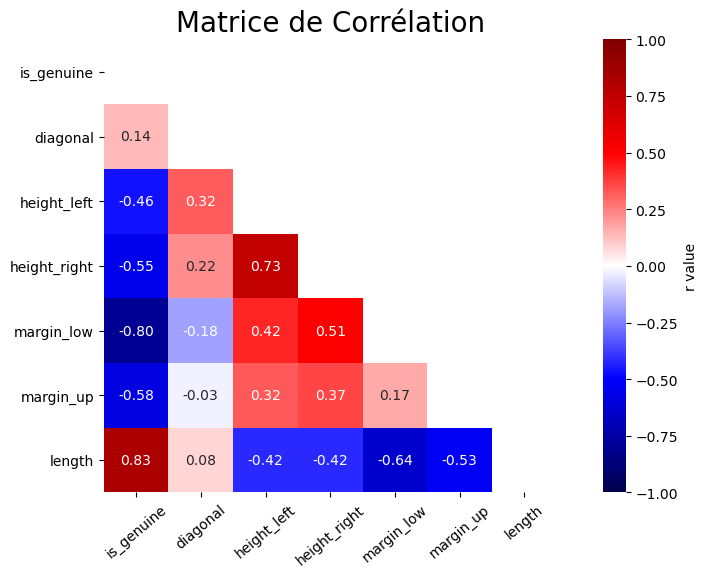

In [4]:
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})
corrMatrix = billets.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrMatrix, cmap='seismic',fmt='.2f',mask=mask, square=True, vmin=-1, vmax=1,
            cbar_kws={'label': 'r value'},annot=corrMatrix.iloc[:,:]) #
plt.title("Matrice de Corrélation",fontsize=20)
plt.xticks(rotation = 40)
plt.savefig('OUTPUTS_FORMATION/P6_0_pearson_matrix.jpg',dpi=300)
plt.show()

*Forte corrélation positive entre longueur du billet et authenticité*

*Forte corrélation négative entre marge haute du billet et authenticité*

*Les autres variables présentent une corrélation plutôt moyenne*

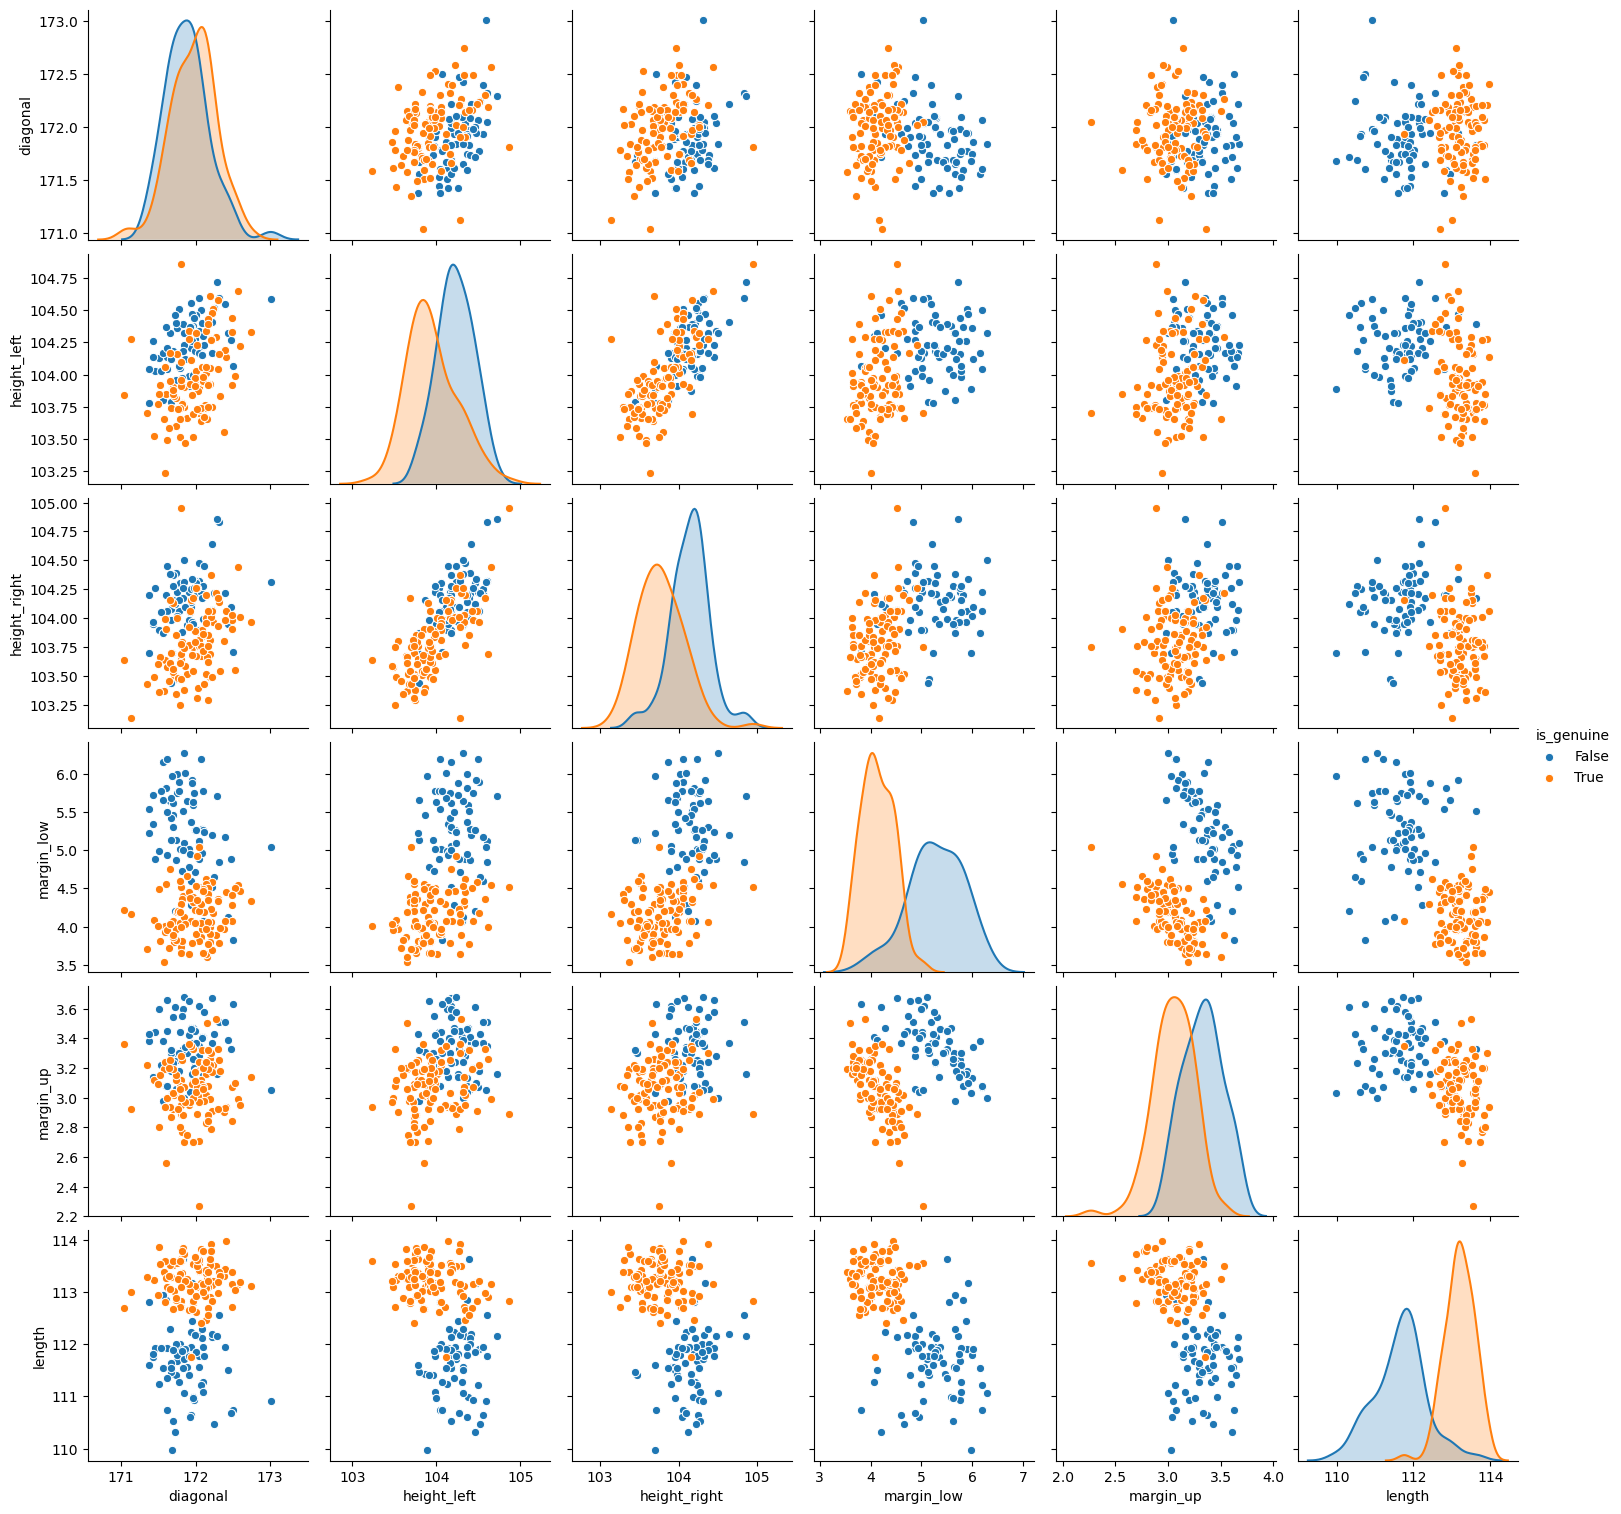

In [5]:
# billets['is_genuine']=billets['is_genuine'].replace(True,1)
# billets['is_genuine']=billets['is_genuine'].replace(False,0)
# billets['is_genuine']= pd.to_numeric(billets['is_genuine'])
# pd.plotting.scatter_matrix(billets, alpha=0.2)
sns.pairplot(billets, hue="is_genuine")
plt.savefig('OUTPUTS_FORMATION/P6_0_pairplot.jpg',dpi=300)
plt.show()

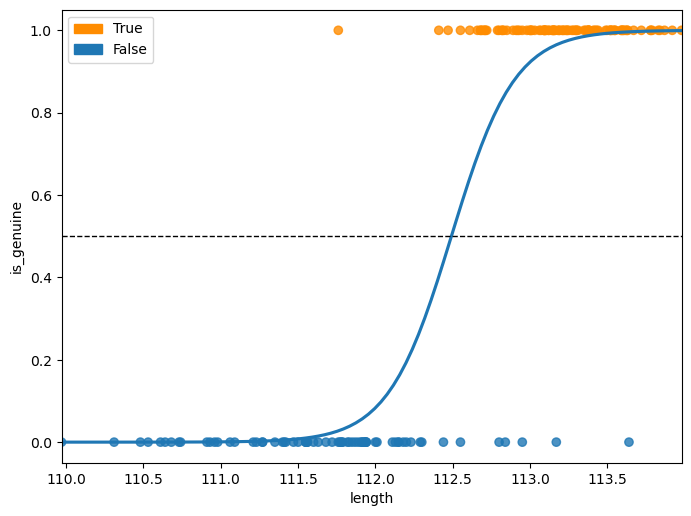

In [6]:
fig = plt.figure(figsize=(8,6))
reg_illust = billets.copy()
value=(reg_illust['is_genuine']==True) #& (reg_illust['is_genuine']==False)
reg_illust['color']= np.where( value==True , 'darkorange', "C0")
sns.regplot(x='length', y='is_genuine', data=reg_illust, logistic=True,
            scatter_kws={'color': list(reg_illust['color'].values)})
colors = {'True':'darkorange','False':'tab:blue'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=colors[label]) for label in labels] 
plt.legend(handles, labels, ncol=1, shadow=False, loc='best',fontsize=10)
plt.axhline(0.5, color='k', ls='--',lw=1)
plt.savefig('OUTPUTS_FORMATION/P6_0_sigmoid_plot.jpg',dpi=300)
plt.show()

*A priori, plus un billet présente une longueur supérieure, plus il tend à être authentique*

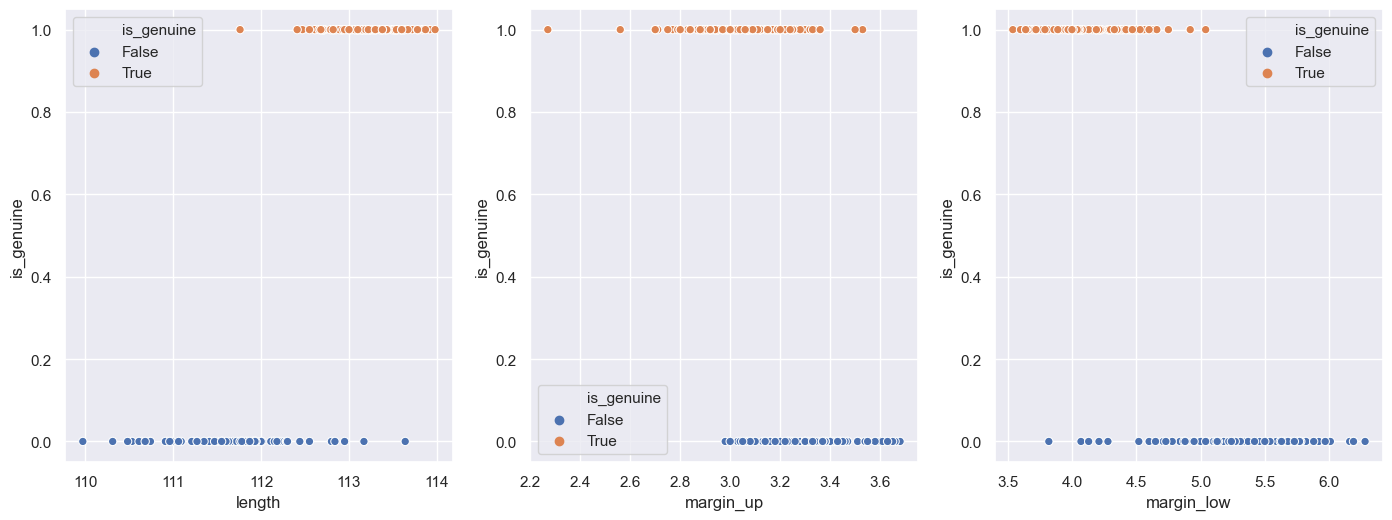

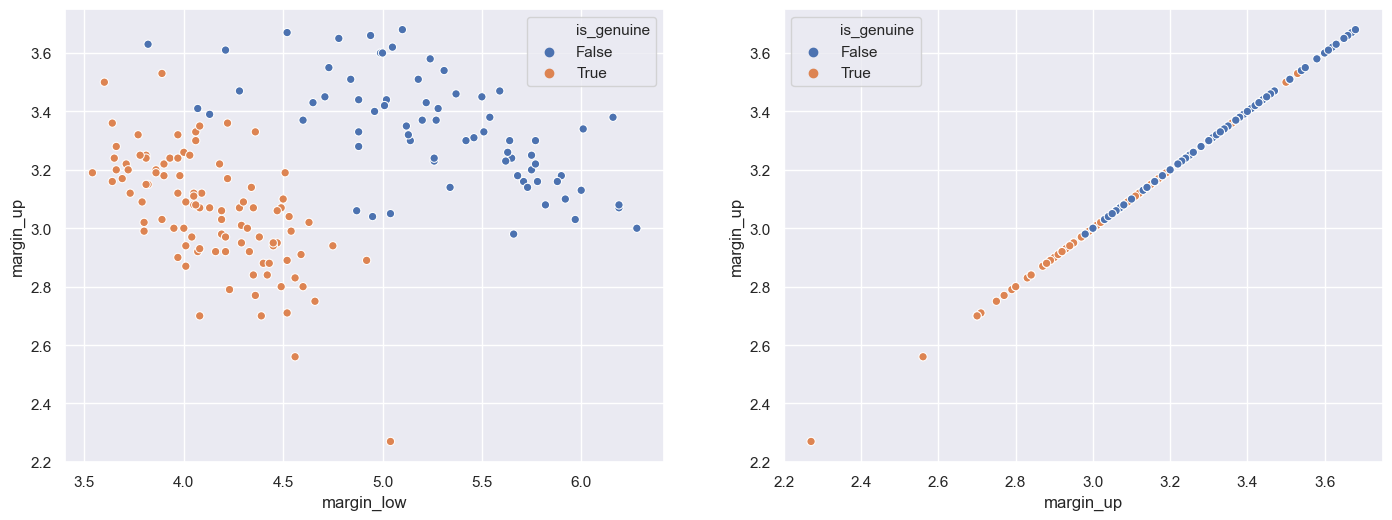

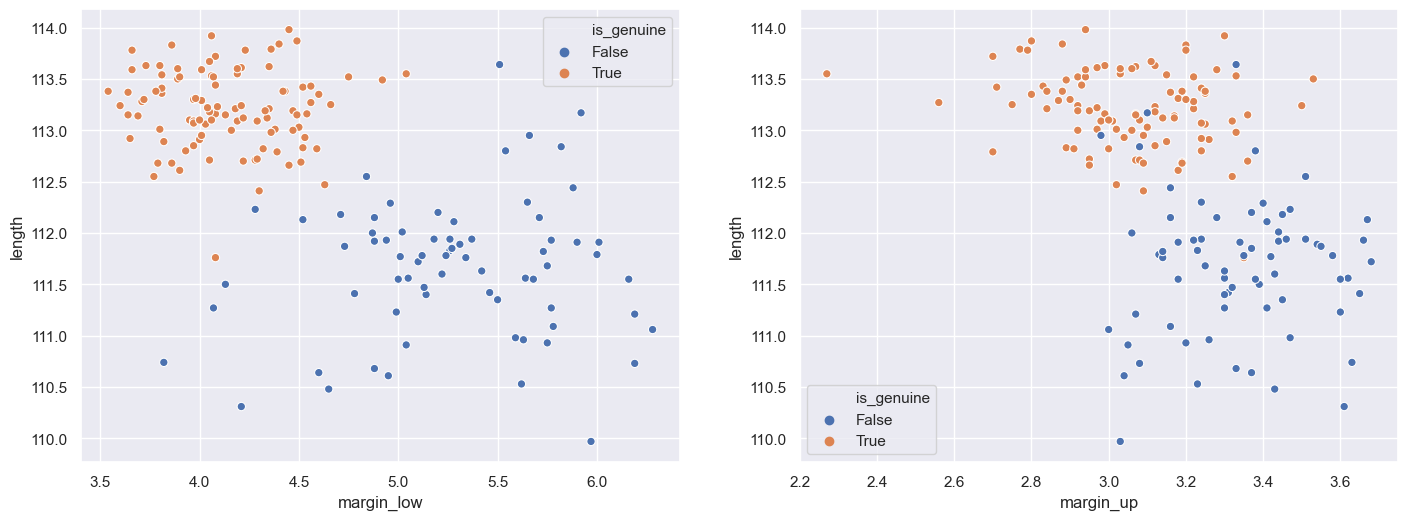

In [7]:
sns.set(rc={'figure.figsize':(17,6)})
f, axes = plt.subplots(1, 3)
ax = sns.scatterplot(x="length", y="is_genuine", hue="is_genuine", data=billets, ax=axes[0])
ax = sns.scatterplot(x="margin_up", y="is_genuine", hue="is_genuine", data=billets, ax=axes[1])
ax = sns.scatterplot(x="margin_low", y="is_genuine", hue="is_genuine", data=billets, ax=axes[2])
plt.savefig('OUTPUTS_FORMATION/P6_0_subplot1.jpg',dpi=300)
plt.show()
f, axes = plt.subplots(1, 2)
sns.scatterplot(x="margin_low", y="margin_up", hue="is_genuine",data=billets, ax=axes[0])
sns.scatterplot(x="margin_up", y="margin_up", hue="is_genuine",data=billets, ax=axes[1])
plt.savefig('OUTPUTS_FORMATION/P6_0_subplot2.jpg',dpi=300)
plt.show()
f, axes = plt.subplots(1, 2)
sns.scatterplot(x="margin_low", y="length", hue="is_genuine",data=billets, ax=axes[0])
sns.scatterplot(x="margin_up", y="length", hue="is_genuine",data=billets, ax=axes[1])
plt.savefig('OUTPUTS_FORMATION/P6_0_subplot3.jpg',dpi=300)
plt.show()

*2 voire 3 paramètres semblent donner des indices sur l'authenticité des billets*

*La logueur du billet semble être un critère discriminant sur son authenticité*

## Mission 1 : ACP

#### Réalisation ACP (éboulis, cercle des corrélations, projection des individus)

Variance [F1, F2] = [0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


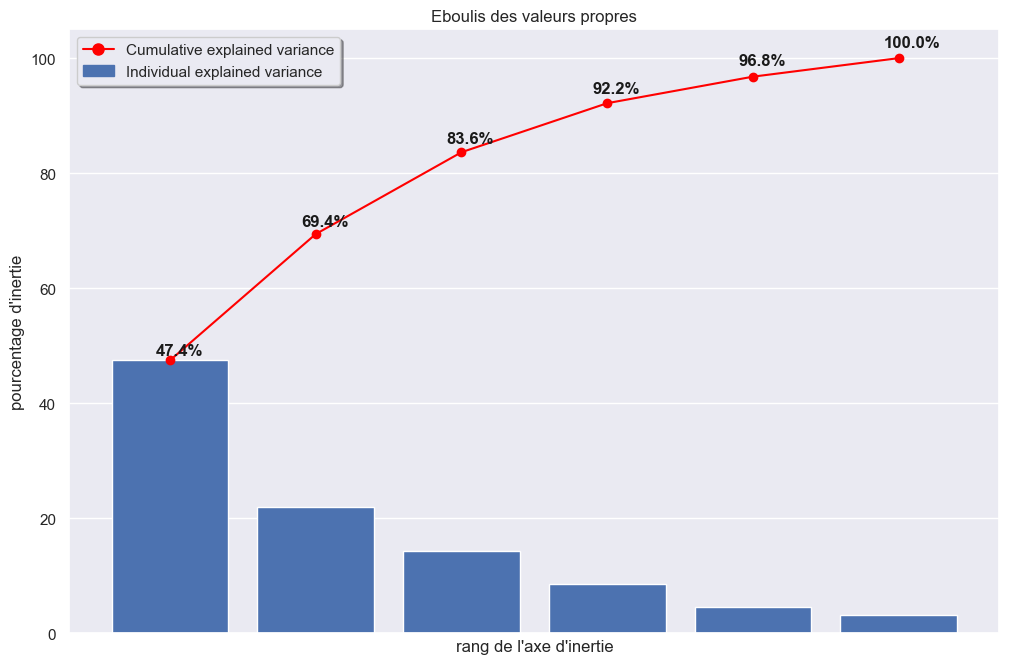

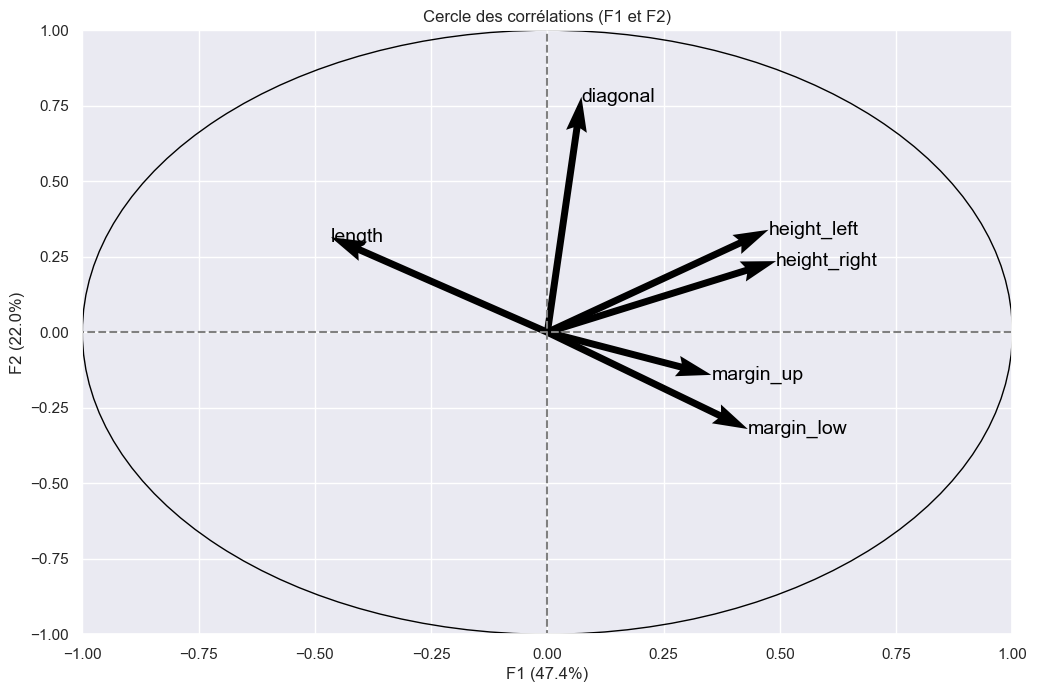

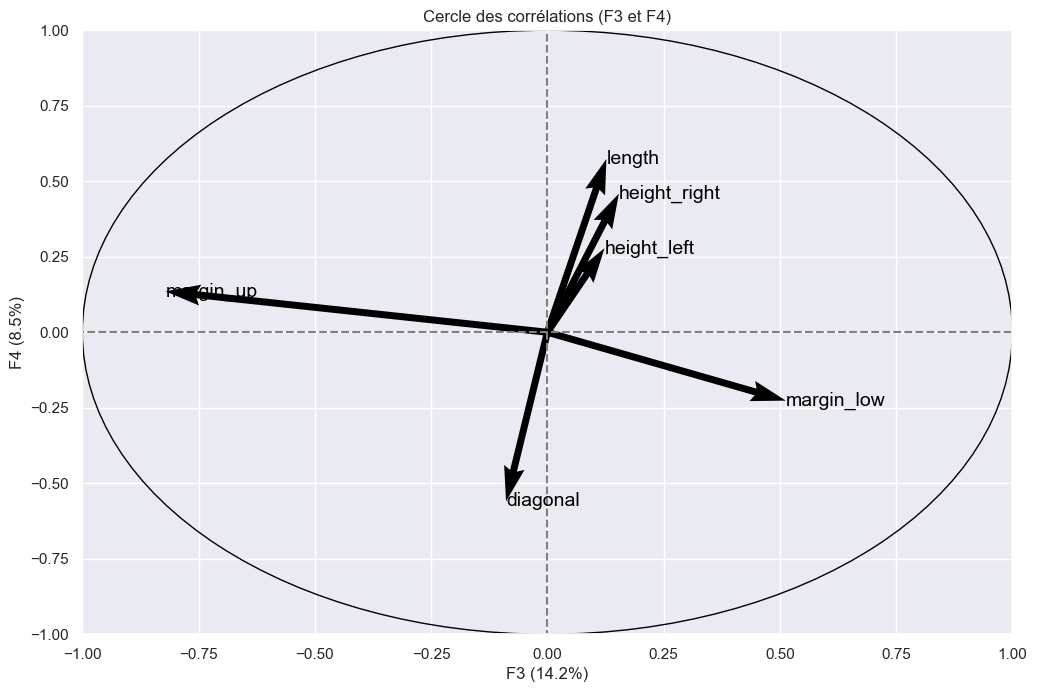

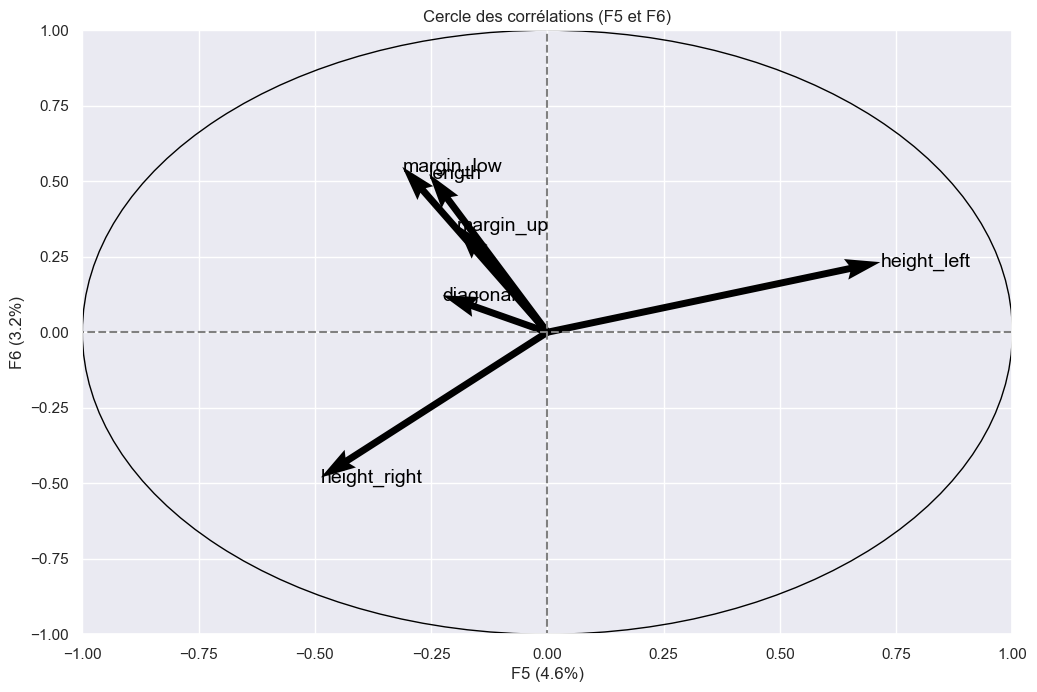

C:\Users\HP\AppData\Local\Temp/ipykernel_8128/1777427687.py:64: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([-0.7, 1.7], [-3, 3], 'k-', color = 'g',ls='-',lw=3)
C:\Users\HP\AppData\Local\Temp/ipykernel_8128/1777427687.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-0.7, 1.7], [-3, 3], 'k-', color = 'g',ls='-',lw=3)


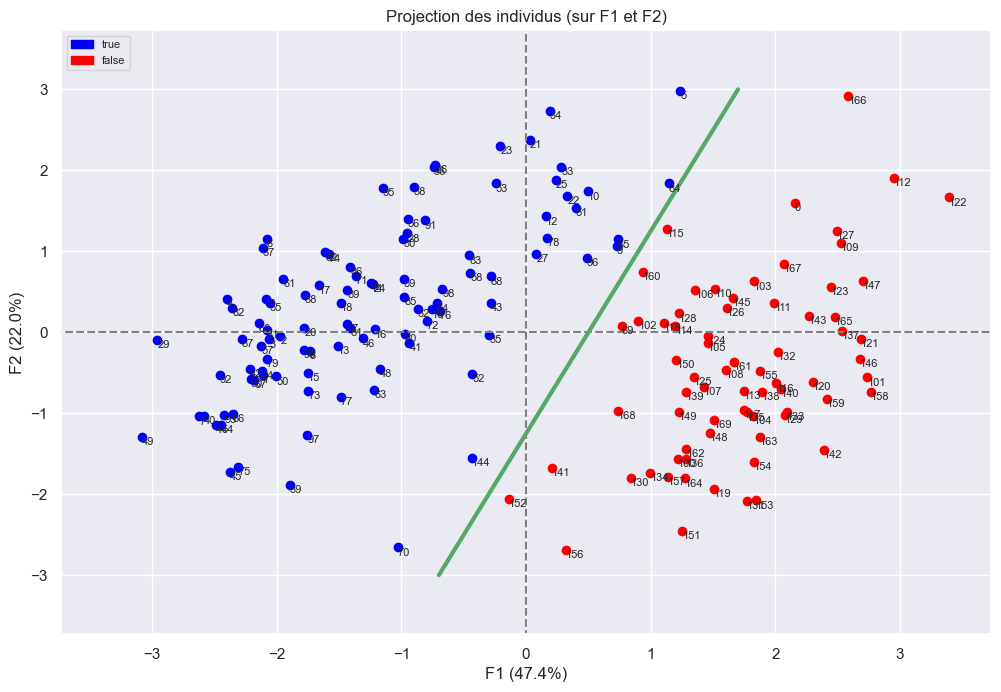

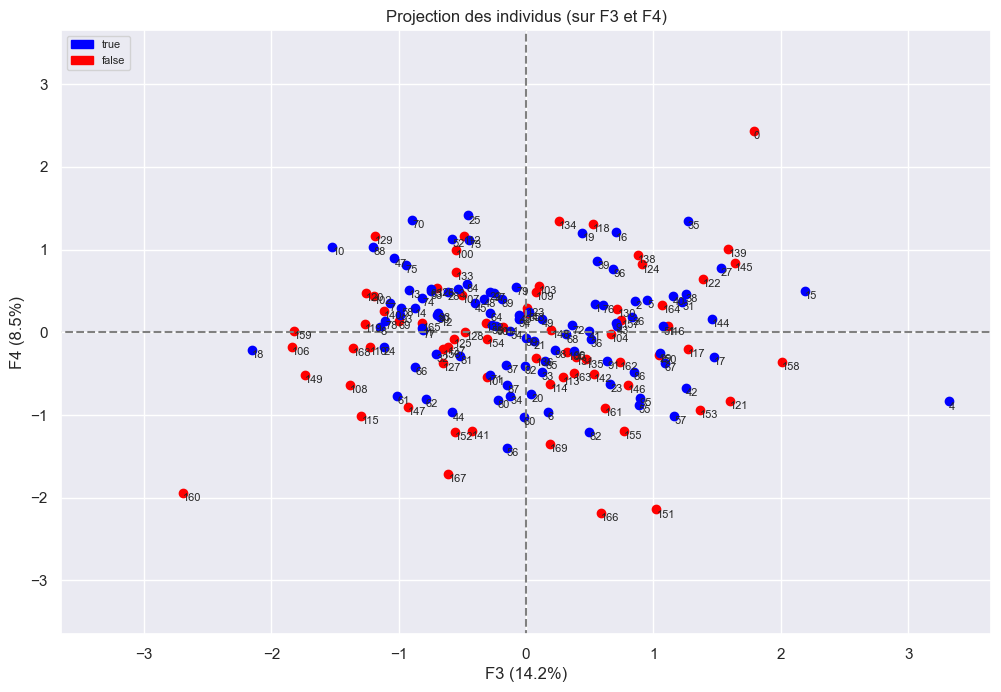

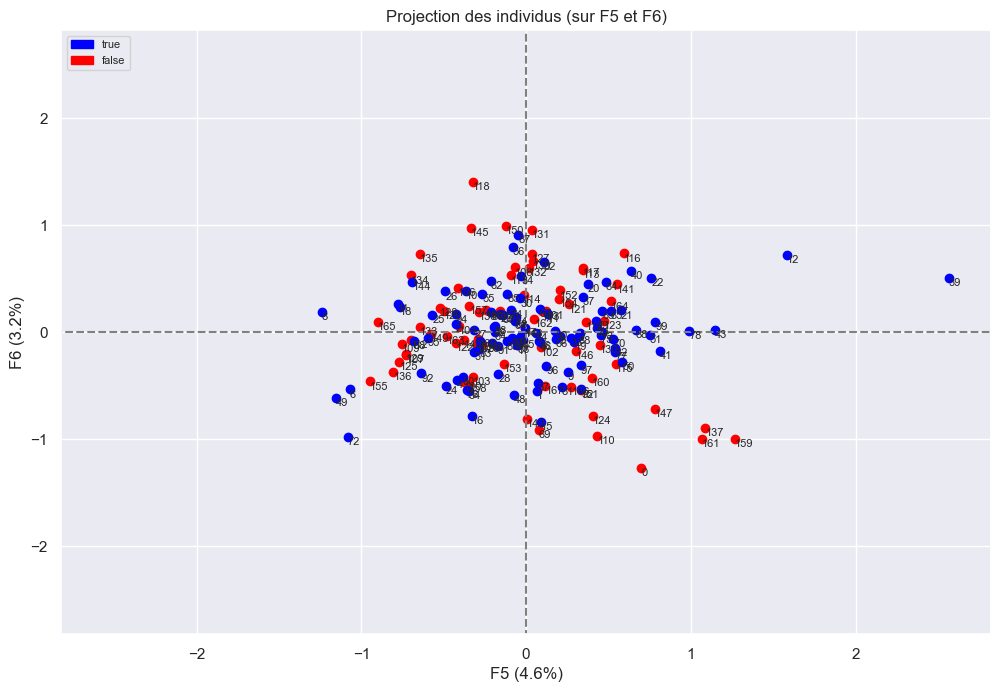

In [8]:
# Choix du nombre de composantes à calculer
n_comp = 6                                    # Nbmaxi = Min(p,n-1) = Min(7,170-1)

# selection des colonnes à prendre en compte dans l'ACP
data_pca = billets[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']]

# préparation des données pour l'ACP
# data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X        = data_pca.values
names    = list(data_pca.index)
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)     #Compute the mean and std to be used for later scaling
# std_scale = preprocessing.RobustScaler().fit(X)         #Removes the median and scales the data according to the quantile range
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, method='ward', metric='euclidean', optimal_ordering=False)

# Découpage en n clusters : Authentique & Faux
n_cluster = 2
clusters = fcluster(Z, n_cluster, criterion='maxclust')

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Projection des individus
X_projected = pca.transform(X_scaled)

print('Variance [F1, F2] =',pca.explained_variance_ratio_)
# X_trans=pca.transform(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)
plt.xticks([])
plt.annotate(str(np.round(100*pca.explained_variance_ratio_[0],1))+'%',xy=(.9,102*pca.explained_variance_ratio_[0]),size=12,color='k', weight='bold')
plt.annotate(str(np.round(100*((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])),1))+'%',xy=(1.9,102*(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])),size=12,color='k', weight='bold')
plt.annotate(str(np.round(100*((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2])),1))+'%',xy=(2.9,102*(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2])),size=12,color='k', weight='bold')
plt.annotate(str(np.round(100*((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3])),1))+'%',xy=(3.9,102*(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3])),size=12,color='k', weight='bold')
plt.annotate(str(np.round(100*((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4])),1))+'%',xy=(4.9,102*(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4])),size=12,color='k', weight='bold')
plt.annotate(str(np.round(100*((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4]+pca.explained_variance_ratio_[5])),1))+'%',xy=(5.9,102*(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]+pca.explained_variance_ratio_[4]+pca.explained_variance_ratio_[5])),size=12,color='k', weight='bold')
plt.savefig('OUTPUTS_FORMATION/P6_eboulis.jpg',dpi=300)
plt.show()

# Cercle des corrélations
pcs = pca.components_

# Adaptation de la fonction pr obtention 2 infos sur le même tracé (ajout scale factor pour les corrélations)
display_circles(X_projected,pcs, n_comp, pca, [(0,1)], labels = np.array(features), illustrative_var=clusters,alpha=1)
plt.savefig('OUTPUTS_FORMATION/P6_Cerclecorr_F1F2.jpg',dpi=300)
plt.show()
display_circles(X_projected,pcs, n_comp, pca, [(2,3)], labels = np.array(features), illustrative_var=clusters,alpha=1)
plt.savefig('OUTPUTS_FORMATION/P6_Cerclecorr_F3F4.jpg',dpi=300)
plt.show()
display_circles(X_projected,pcs, n_comp, pca, [(4,5)], labels = np.array(features), illustrative_var=clusters,alpha=1)
plt.savefig('OUTPUTS_FORMATION/P6_Cerclecorr_F5F6.jpg',dpi=300)
plt.show()

# Projection des individus
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=np.array(names), alpha=1, illustrative_var=clusters)
plt.plot([-0.7, 1.7], [-3, 3], 'k-', color = 'g',ls='-',lw=3)
plt.savefig('OUTPUTS_FORMATION/P6_Proj_F1F2_v_clusters.jpg',dpi=300)
plt.show()
display_factorial_planes(X_projected, n_comp, pca, [(2,3)], labels=np.array(names), alpha=1, illustrative_var=clusters)
plt.savefig('OUTPUTS_FORMATION/P6_Proj_F3F4_v_clusters.jpg',dpi=300)
plt.show()
display_factorial_planes(X_projected, n_comp, pca, [(4,5)], labels=np.array(names), alpha=1, illustrative_var=clusters)
plt.savefig('OUTPUTS_FORMATION/P6_Proj_F5F6_v_clusters.jpg',dpi=300)
plt.show()

In [9]:
F1_var = pca.explained_variance_ratio_[0]
F2_var = pca.explained_variance_ratio_[1]

#### Valeurs propres et Variance expliquée

In [10]:
eig = pd.DataFrame({"Composantes" : ["Comp" + str(x + 1) for x in range(n_comp)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100,1),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100,1)},
        columns = ["Composantes", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"])
eig

,Composantes,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Comp1,2.863721,47.4,47.4
1,Comp2,1.325222,22.0,69.4
2,Comp3,0.859125,14.2,83.6
3,Comp4,0.514605,8.5,92.2
4,Comp5,0.278407,4.6,96.8
5,Comp6,0.194424,3.2,100.0


#### Critère de Kaiser

In [11]:
# Par définition, K = 100/p en %
K_def1 = 100/6
print('\x1b[6;31;40m','K (en %var expliquée) :',round(K_def1,1),'%',"est l'inertie en dessous de laquelle les axes ou composantes ne sont pas importants",'\x1b[0m')

# en ACP normée : On ne retiendra que les axes associés à des valeurs propre supérieures à 1
K_def2 = len(eig[(eig["Valeur propre"]>1)])
print('\x1b[6;31;40m','équivaut à\n','K (en terme de valeur propre) :',K_def2,'axes ou composantes associés à des VP > 1','\x1b[0m')

 K (en %var expliquée) : 16.7 % est l'inertie en dessous de laquelle les axes ou composantes ne sont pas importants 
 équivaut à
 K (en terme de valeur propre) : 2 axes ou composantes associés à des VP > 1 


#### Contribution des individus dans l'inertie totale

In [12]:
dist_orig = np.sum(X_scaled**2,axis=1)
contrib_individu = pd.DataFrame({'ind':names,'dist²':dist_orig})
print('HIGHest individual contribution\n',contrib_individu.sort_values(by='dist²', ascending=False).head(5))
print('\nLOWest individual contribution\n',contrib_individu.sort_values(by='dist²', ascending=False).tail(5))
ind_inertot_larg = contrib_individu.nlargest(5,'dist²').index.values
ind_inertot_small = contrib_individu.nsmallest(5,'dist²').index.values
print('\x1b[6;31;40m','5 highest individual contributions to VAR_tot',ind_inertot_larg,'\n 5 lowest individual contributions to VAR_tot', ind_inertot_small,'\x1b[0m')

HIGHest individual contribution
      ind      dist²
166  166  20.625650
0      0  18.410598
4      4  18.039567
122  122  16.790944
39    39  15.052608

LOWest individual contribution
     ind     dist²
59   59  1.484454
76   76  1.435202
85   85  1.431664
98   98  0.878319
64   64  0.813929
 5 highest individual contributions to VAR_tot [166   0   4 122  39] 
 5 lowest individual contributions to VAR_tot [64 98 85 76 59] 


#### Qualité de représentation des individus - cos²

In [13]:
cos2 = X_projected**2
for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/dist_orig
Qual_ind = pd.DataFrame({'ind':names,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4],'COS2_6':cos2[:,5]}) #si n_comp=6 etc...
print('QUALity individual representation\n',Qual_ind.head(5))

# Check somme en ligne des cos2 = 1
print('\n\x1b[6;31;40m','Σ rows should be =1:','\x1b[0m')
print(np.round(np.sum(cos2,axis=1),1))

QUALity individual representation
    ind    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5    COS2_6
0    0  0.251929  0.139000  0.173540  0.321649  0.026592  0.087290
1    1  0.818002  0.050822  0.054065  0.021803  0.000835  0.054472
2    2  0.784862  0.000466  0.148652  0.028320  0.036393  0.001306
3    3  0.882856  0.001652  0.058789  0.056169  0.000230  0.000305
4    4  0.320145  0.009417  0.610831  0.038839  0.009786  0.010982

 Σ rows should be =1: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


#### Contribution des individus aux axes

In [14]:
n = billets.shape[0] #nind
ctr = X_projected**2
for j in range(n_comp):
    ctr[:,j] = ctr[:,j]/(n*eig["Valeur propre"][j])
Contrib_ind = pd.DataFrame({'ind':names,'CONTR_1':ctr[:,0],'CONTR_2':ctr[:,1],'CONTR_3':ctr[:,2],'CONTR_4':ctr[:,3],'CONTR_5':ctr[:,4],'CONTR_6':ctr[:,5]})
print('HIGHest Comp_1 individual contribution\n',Contrib_ind.sort_values(by='CONTR_1', ascending=False).head(5))
print('\nHIGHest Comp_2 individual contribution\n',Contrib_ind.sort_values(by='CONTR_2', ascending=False).head(5))

# Check somme en colonne des cos2 = 1
print('\n\x1b[6;31;40m','Σ columns should be =1:','\x1b[0m')
print(np.round(np.sum(ctr,axis=0),1))

ind_max_comp1 = Contrib_ind.nlargest(5,'CONTR_1').index.values
ind_max_comp2 = Contrib_ind.nlargest(5,'CONTR_2').index.values
print('\n\x1b[6;31;40m','5 highest individual contributions on Comp_1',ind_max_comp1,'\n 5 lowest individual contributions on Comp_2', ind_max_comp2,'\x1b[0m')

HIGHest Comp_1 individual contribution
      ind   CONTR_1   CONTR_2   CONTR_3   CONTR_4   CONTR_5   CONTR_6
122  122  0.023618  0.012300  0.013135  0.004724  0.003794  0.000322
49    49  0.019505  0.007443  0.000107  0.000285  0.028111  0.011319
29    29  0.017982  0.000037  0.007560  0.000748  0.003875  0.000051
112  112  0.017845  0.016164  0.001637  0.015522  0.010394  0.000140
158  158  0.015743  0.002409  0.027614  0.001485  0.002513  0.007133

HIGHest Comp_2 individual contribution
      ind   CONTR_1   CONTR_2   CONTR_3   CONTR_4   CONTR_5   CONTR_6
5      5  0.003136  0.039503  0.006219  0.001728  0.000872  0.000028
166  166  0.013729  0.037704  0.002358  0.054509  0.001593  0.007845
34    34  0.000073  0.033106  0.000108  0.006752  0.000019  0.008275
156  156  0.000210  0.032074  0.002928  0.000492  0.000512  0.001191
70    70  0.002184  0.031331  0.005487  0.021065  0.005890  0.000131

 Σ columns should be =1: 
[1. 1. 1. 1. 1. 1.]

 5 highest individual contributions on Comp

#### Affichage des individus singuliers

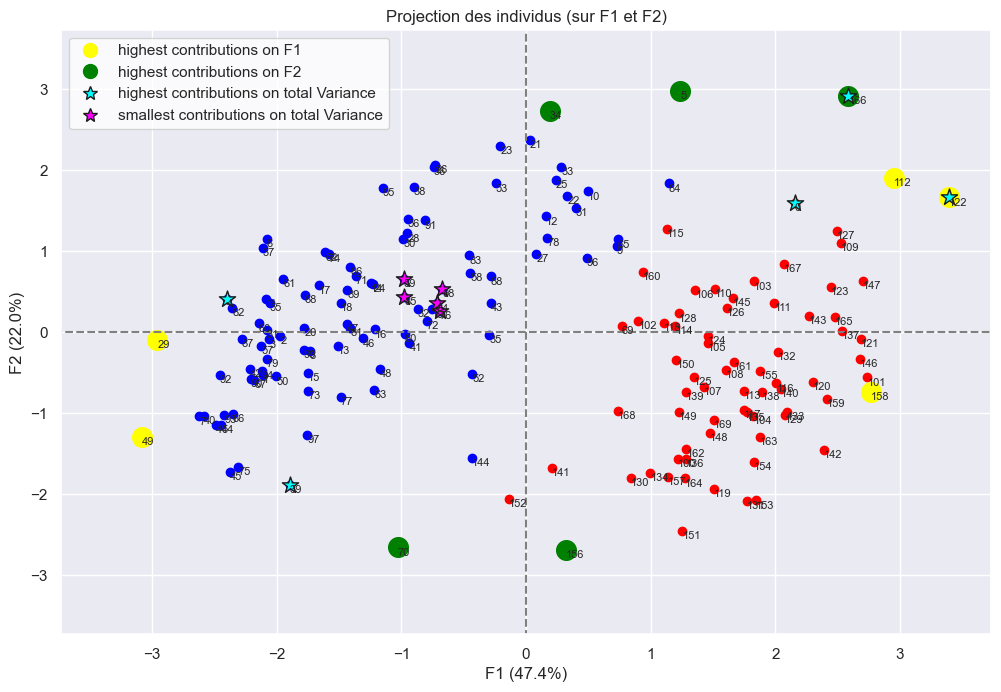

In [15]:
# Relever les coordonnées des 5 highest sur 1er plan factoriel
list_x_Vartotlarg=[]
list_y_Vartotlarg=[]
for j in range(0,1):
    for i in range(0,5):
        xi=X_projected[(ind_inertot_larg)[i]][j]
        yi=X_projected[(ind_inertot_larg)[i]][j+1]
        list_x_Vartotlarg.append(xi)
        list_y_Vartotlarg.append(yi)

list_x_Vartotsmall=[]
list_y_Vartotsmall=[]
for j in range(0,1):
    for i in range(0,5):
        xi=X_projected[(ind_inertot_small)[i]][j]
        yi=X_projected[(ind_inertot_small)[i]][j+1]
        list_x_Vartotsmall.append(xi)
        list_y_Vartotsmall.append(yi)
        
list_x_F1=[]
list_y_F1=[]
for j in range(0,1):
    for i in range(0,5):
        xi=X_projected[(ind_max_comp1)[i]][j]
        yi=X_projected[(ind_max_comp1)[i]][j+1]
        list_x_F1.append(xi)
        list_y_F1.append(yi)

list_x_F2=[]
list_y_F2=[]
for j in range(0,1):
    for i in range(0,5):
        xi=X_projected[(ind_max_comp2)[i]][j]
        yi=X_projected[(ind_max_comp2)[i]][j+1]
        list_x_F2.append(xi)
        list_y_F2.append(yi)

display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=np.array(names), alpha=1, illustrative_var=clusters)
plt.scatter(list_x_F1, list_y_F1, color="yellow",edgecolor='yellow',s=200)
plt.scatter(list_x_F2, list_y_F2, color="green",edgecolor='green',s=200)
plt.scatter(list_x_Vartotlarg, list_y_Vartotlarg, color="cyan",marker='*',edgecolor= 'k',s=150)
plt.scatter(list_x_Vartotsmall, list_y_Vartotsmall, color="magenta",marker='*',edgecolor= 'k',s=150)
colors  = ["yellow","green","cyan","magenta"]
markers = ["o","o","*","*"]
mecs = [None,None,"k","k"]
texts   = ["highest contributions on F1", "highest contributions on F2", "highest contributions on total Variance", "smallest contributions on total Variance"]
patches = [ plt.plot([],[], marker=markers[i], ms=10, ls="", mec=mecs[i], color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, loc='upper left', ncol=1, facecolor="white", numpoints=1 )
plt.savefig('OUTPUTS_FORMATION/P6_Proj_F1F2_v_clusters_annot.jpg',dpi=300)
plt.show()

#### Corrélation des variables avec les axes

In [16]:
#racine carrée des valeurs propres du fait des facteurs en ligne, et variables en colonne
sqrt_eigval = np.sqrt(eig["Valeur propre"])
p = data_pca.shape[1] #nvar
corvar = np.zeros((p,p))
for k in range(n_comp):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
Corr_var_comp = pd.DataFrame({'var':data_pca.columns,'CORR_1':corvar[:,0],'CORR_2':corvar[:,1],'CORR_3':corvar[:,2],'CORR_4':corvar[:,3],'CORR_5':corvar[:,4],'CORR_6':corvar[:,5]}) #si n_comp=6 etc...
print('Matrice des corrélations variables vs composantes\n',Corr_var_comp)

Matrice des corrélations variables vs composantes
             var    CORR_1    CORR_2    CORR_3    CORR_4    CORR_5    CORR_6
0      diagonal  0.124000  0.897507 -0.082395 -0.401529 -0.118769  0.053867
1   height_left  0.804670  0.390539  0.113785  0.199459  0.377750  0.102355
2  height_right  0.832286  0.271153  0.142584  0.329224 -0.256958 -0.212007
3    margin_low  0.729406 -0.368997  0.475316 -0.162502 -0.164576  0.241469
4     margin_up  0.596587 -0.162455 -0.761115  0.097087 -0.102332  0.156258
5        length -0.787529  0.362089  0.117635  0.411551 -0.134241  0.231028


#### Qualité de représentation des variables - cos²

In [17]:
cos2var = corvar**2
Qual_var = pd.DataFrame({'var':data_pca.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5]}) #si n_comp=6 etc...
print('QUALity variable representation\n',Qual_var)

# Check somme en ligne des cos2 = 1
print('\n\x1b[6;31;40m','Σ rows should be =1:','\x1b[0m')
print(np.round(np.sum(cos2var,axis=1),1))

QUALity variable representation
             var    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5    COS2_6
0      diagonal  0.015376  0.805519  0.006789  0.161225  0.014106  0.002902
1   height_left  0.647494  0.152521  0.012947  0.039784  0.142695  0.010477
2  height_right  0.692701  0.073524  0.020330  0.108388  0.066028  0.044947
3    margin_low  0.532034  0.136159  0.225926  0.026407  0.027085  0.058307
4     margin_up  0.355916  0.026392  0.579296  0.009426  0.010472  0.024417
5        length  0.620201  0.131108  0.013838  0.169375  0.018021  0.053374

 Σ rows should be =1: 
[1. 1. 1. 1. 1. 1.]


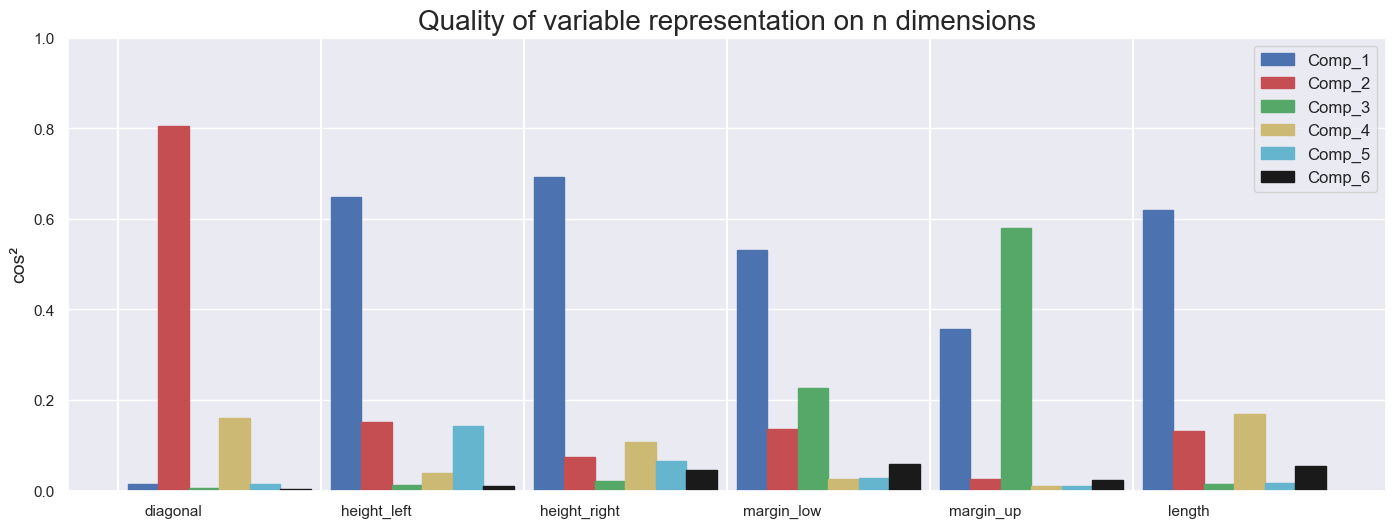

In [18]:
# set width of bars
barWidth = 0.15
xl = 9*[0.] 
yl = [.1,.2,.3,.4,.5,.6,.7,.8,.9] 
# Set position of bar on X axis
r1 = np.arange(len(Qual_var))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
# Make the plot
plt.bar(r1, Qual_var['COS2_1'], color='b', width=barWidth, edgecolor='b', label='var1')
plt.bar(r2, Qual_var['COS2_2'], color='r', width=barWidth, edgecolor='r', label='var2')
plt.bar(r3, Qual_var['COS2_3'], color='g', width=barWidth, edgecolor='g', label='var3')
plt.bar(r4, Qual_var['COS2_4'], color='y', width=barWidth, edgecolor='y', label='var4')
plt.bar(r5, Qual_var['COS2_5'], color='c', width=barWidth, edgecolor='c', label='var5')
plt.bar(r6, Qual_var['COS2_6'], color='k', width=barWidth, edgecolor='k', label='var6')
plt.title('Quality of variable representation on n dimensions',fontsize=20)
plt.ylabel('cos²',fontsize=14)
plt.ylim(0,1)
plt.xticks([r + barWidth for r in range(len(Qual_var))], Qual_var['var'])
plt.grid(False)
plt.gca().yaxis.grid(True)
xcoord=[-0.125,0.875,1.875,2.875,3.875,4.875]#,5.875,6.875]
for i in xcoord:
    plt.axvline(i*r1[5].any(), linestyle='-', color='w') 
my_colors = {'Comp_1':'b','Comp_2':'r','Comp_3':'g','Comp_4':'y','Comp_5':'c','Comp_6':'k'}
lab_col = list(my_colors.keys())
handles = [plt.Rectangle((0,0),0,0, color=my_colors[label]) for label in lab_col]
plt.legend(handles, lab_col, ncol=1, shadow=False, loc='best',fontsize=12)
plt.savefig('OUTPUTS_FORMATION/P6_0_quality_variables.jpg',dpi=300)
plt.show()

*les deux premières composantes expliquent à elles-seules plus de la moitié de la qualité représentative des variables, on peut aussi noter que la composante F3 importe aussi dans une moindre mesure*

#### Contribution des variables aux axes

In [19]:
ctrvar = cos2var
for k in range(n_comp):
    ctrvar[:,k] = ctrvar[:,k]/(eig["Valeur propre"][k])

#on n'affiche que pour les deux premiers axes
Contrib_var = pd.DataFrame({'var':data_pca.columns,'CONTR_1':ctrvar[:,0],'CONTR_2':ctrvar[:,1],'CONTR_3':ctrvar[:,2],'CONTR_4':ctrvar[:,3],'CONTR_5':ctrvar[:,4],'CONTR_6':ctrvar[:,5]})
print('Variable contributions\n',Contrib_var)

# Check somme en colonne des cos2 = 1
print('\n\x1b[6;31;40m','Σ columns should be =1:','\x1b[0m')
print(np.round(np.sum(ctrvar,axis=0),2))

Variable contributions
             var   CONTR_1   CONTR_2   CONTR_3   CONTR_4   CONTR_5   CONTR_6
0      diagonal  0.005369  0.607837  0.007902  0.313299  0.050668  0.014925
1   height_left  0.226102  0.115091  0.015070  0.077310  0.512542  0.053885
2  height_right  0.241888  0.055480  0.023664  0.210624  0.237162  0.231182
3    margin_low  0.185784  0.102744  0.262972  0.051315  0.097287  0.299899
4     margin_up  0.124284  0.019915  0.674285  0.018317  0.037614  0.125585
5        length  0.216572  0.098933  0.016107  0.329135  0.064728  0.274525

 Σ columns should be =1: 
[1. 1. 1. 1. 1. 1.]


## Mission 2 : Algorithme k-means

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


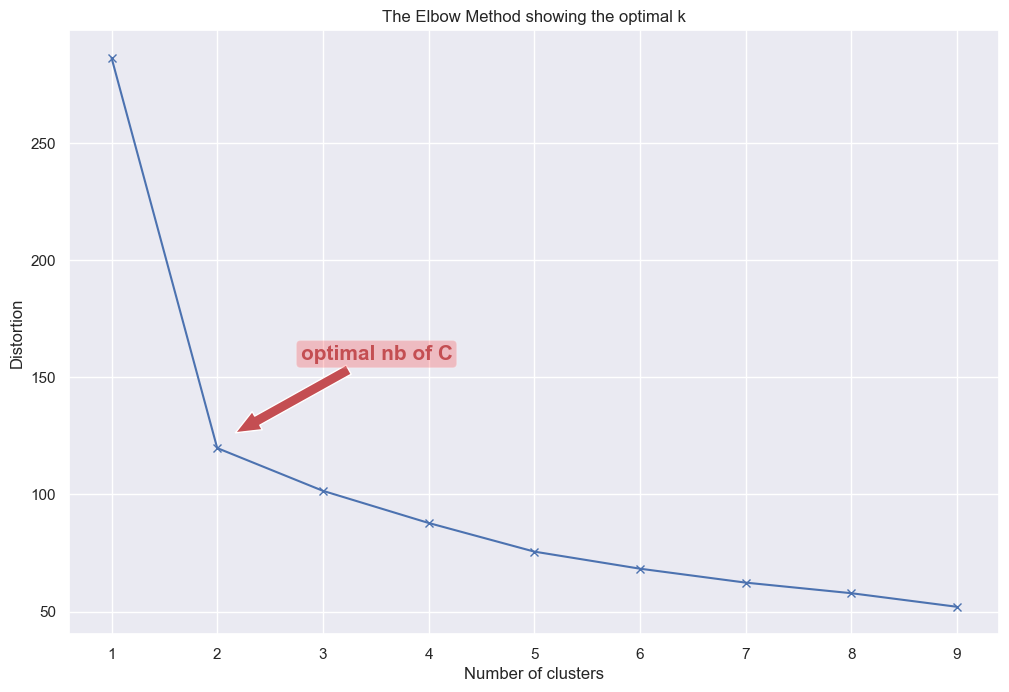

In [20]:
# Determination graphique du nb de clusters à considérer
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
circle_rad = 15
plt.annotate('optimal nb of C',xy=(2, 122),size=15,color='r', weight='bold',xytext=(60, 60),textcoords='offset points',
         bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.2),
         arrowprops=dict(arrowstyle='simple,tail_width=0.5,head_width=1,head_length=1.2',facecolor='r',shrinkB=circle_rad*1)
            )
# plt.axvline(x=2      ,color='r',ls='--',lw=2,ymin=0, ymax=0.25)   
# plt.axhline(y=122    ,color='r',ls='--',lw=2,xmin=0, xmax=0.15)                     
plt.savefig('OUTPUTS_FORMATION/P6_0_elbow_k-means.jpg',dpi=300)
plt.show()

C:\Users\HP\AppData\Local\Temp/ipykernel_8128/2530853867.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0, 0.5], [-2, 2], 'k-', color = 'g',ls='-',lw=3)
C:\Users\HP\AppData\Local\Temp/ipykernel_8128/2530853867.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.5], [-2, 2], 'k-', color = 'g',ls='-',lw=3)


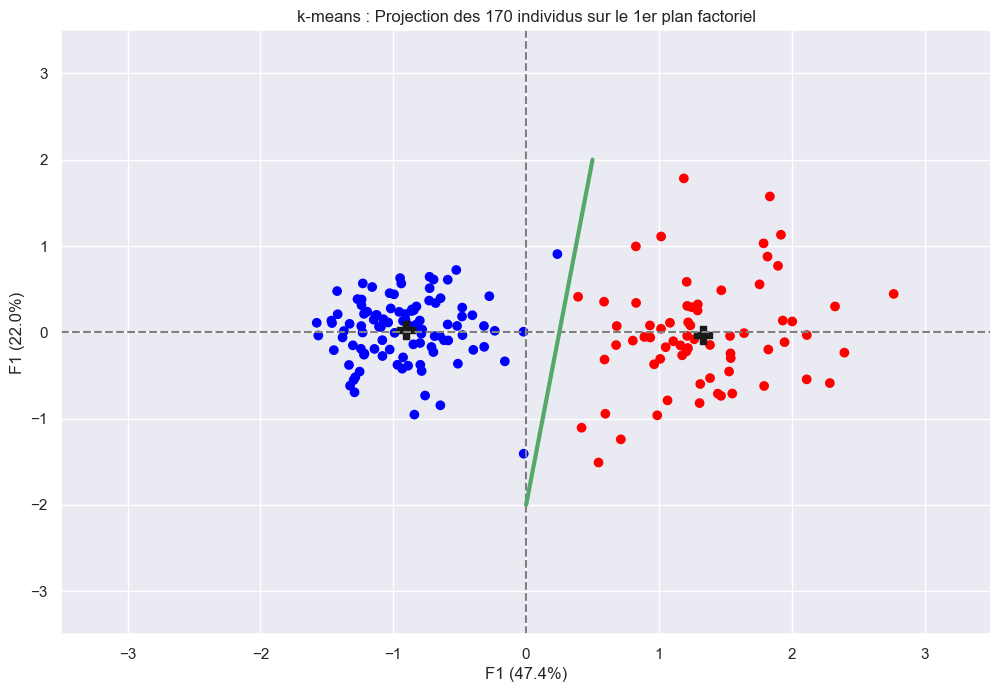

In [21]:
# Nombre de clusters souhaités
n_clust = 2

data = billets

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)
# X_scaled = preprocessing.RobustScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.figure(figsize=(12,8))
pca = decomposition.PCA(n_components=2).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float),cmap="bwr", alpha=1) 

centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)

plt.scatter(centroids_projected[:,0],centroids_projected[:,1],marker='P',c='k',s=150)
plt.title("k-means : Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.axhline(y=0, color='grey',ls='--')
plt.axvline(x=0, color='grey',ls='--')
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel('F{} ({}%)'.format(1, round(100*F1_var,1)))
plt.ylabel('F{} ({}%)'.format(1, round(100*F2_var,1)))
plt.plot([0, 0.5], [-2, 2], 'k-', color = 'g',ls='-',lw=3)
plt.savefig('OUTPUTS_FORMATION/P6_0_Class_k-means.jpg',dpi=300)
plt.show()

In [22]:
billets.insert(1, "Cluster", clusters, allow_duplicates=False)
# billets

#### Matrice de confusion

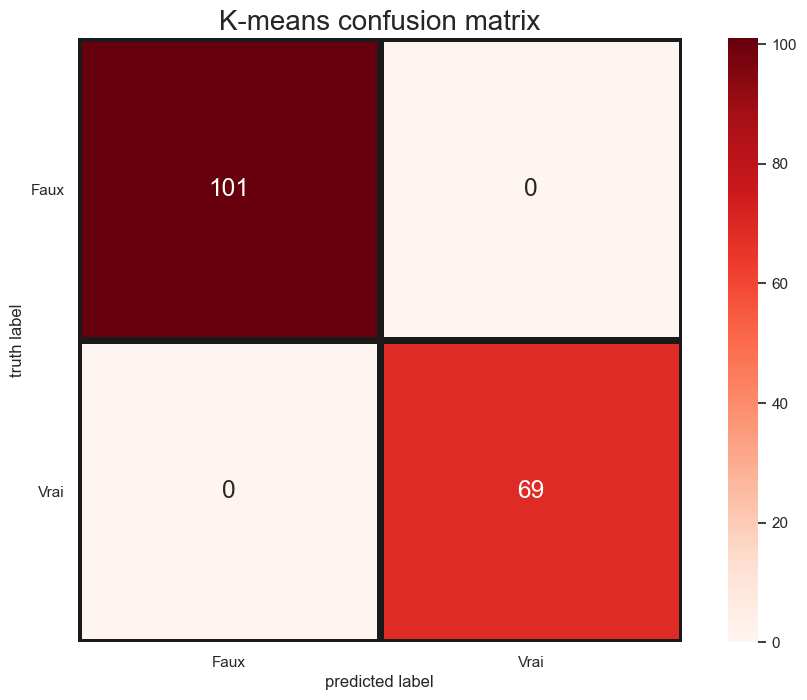

In [23]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(km.labels_, km.predict(X))
plt.figure(figsize=(12,8))
x_axis_labels = ['Faux','Vrai']
y_axis_labels = ['Faux','Vrai']         
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=5, linecolor="k",square = True, cmap = 'Reds',
            annot_kws={"size": 25 / np.sqrt(len(cm))},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels
           );
plt.yticks(rotation = 0)
plt.xlabel("predicted label")
plt.ylabel("truth label")
plt.title('K-means confusion matrix', size = 20)
plt.savefig('OUTPUTS_FORMATION/P6_0_Matrix_kmeans.jpg',dpi=300)
plt.show()

#### ARI (Adjusted Rand Index)

In [24]:
# A score close to 0.0 indicates random assignments
# A score close to 1 indicates perfectly labeled clusters
from sklearn.metrics import adjusted_rand_score
ARI = adjusted_rand_score(km.labels_, km.predict(X)) # adjusted_rand_score(labels_true, labels_pred)
print('\x1b[6;31;40m','Adjusted Rand Index :',np.round(ARI,2),'\x1b[0m') 

 Adjusted Rand Index : 1.0 


#### AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

 ROC_AUC_SCORE 1.0 , le classificateur n’a aucun FP ni aucun FN, il est parfaitement exact, ne se trompant jamais 


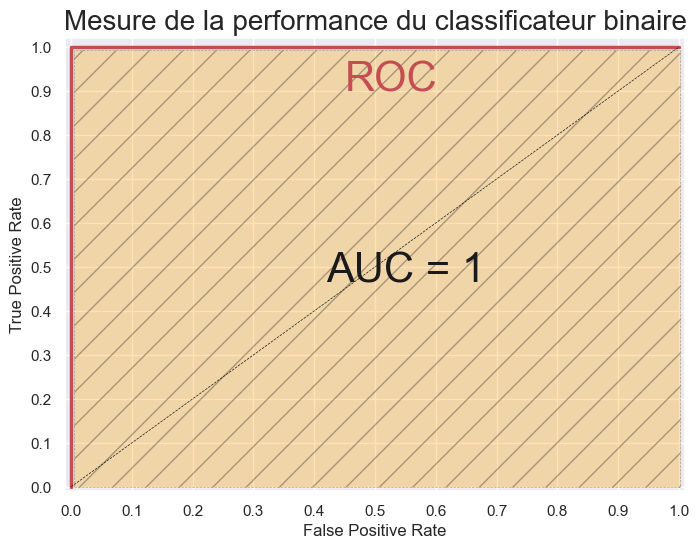

In [25]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
from sklearn.metrics import roc_curve, auc, roc_auc_score
test = km.labels_
pred = km.predict(X)
fpr, tpr, _ = roc_curve(test, pred)
roc_auc = auc(fpr, tpr)
print('\x1b[6;31;40m',"ROC_AUC_SCORE",roc_auc_score(test, pred),", le classificateur n’a aucun FP ni aucun FN, il est parfaitement exact, ne se trompant jamais",'\x1b[0m')
plt.figure()
plt.plot(fpr, tpr,c='r', lw=2.5)
plt.plot([0.0, 1.0], [0.0, 1.0], ls='--', lw=0.5, c='k')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.42, .465, "AUC = 1",fontsize=30,color='k')
plt.text(.45, .9, "ROC",fontsize=30,color='r')
plt.title("Mesure de la performance du classificateur binaire",fontsize=20)
plt.xticks(np.arange(0,1.1,.1))
plt.yticks(np.arange(0,1.1,.1))
from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1-.995, 0), .996, .994,alpha=0.3,
                               edgecolor = 'black', facecolor = 'orange',
                      fill = True, hatch = '/', linestyle = 'dashed',
                      linewidth = .5, zorder = 1)
                     )
plt.savefig('OUTPUTS_FORMATION/P6_0_AUC_ROC_curve.jpg',dpi=300)
plt.show()
# https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

* Higher the AUC, the better the model is at distinguishing between fake and false tickets 

## Mission 2 : Régression logistique

In [26]:
DTrain = billets.copy()

#y (is_genuine) est la première colonne
yTrain = DTrain.iloc[:,0]
# print('\x1b[6;30;43m','yTrain\n', yTrain,'\x1b[0m')

#X (les autres) sont les variables qui succèdent à la première
XTrain = DTrain.iloc[:,1:]
# print(' ')
# print('\x1b[6;30;42m','XTrain\n',XTrain,'\x1b[0m')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XTrain, yTrain, test_size=0.2, random_state=0)

###  2 - Statmodels Library

In [27]:
# On ajoute une colonne pour la constante
import statsmodels.api as sm
print('version statmodel',sm.__version__)

from statsmodels.tools import add_constant
x_train = sm.tools.add_constant(x_train)
x_test  = sm.tools.add_constant(x_test)

version statmodel 0.12.2


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Itération : Jeu de variables n°1

In [28]:
# On retient les variables suivant la covariance mise en évidence (cf. Pearson matrix)
# x_trainbis=x_train[['const','diagonal','height_left','height_right','margin_low','margin_up','length']] => Max nb_ite exceeded
# x_trainbis=x_train[['const',           'height_left','height_right','margin_low','margin_up','length']] => Max nb_ite exceeded
# x_trainbis=x_train[['const',                         'height_right','margin_low','margin_up','length']] => Max nb_ite exceeded
x_trainbis_jet1=x_train[['const','height_right','margin_up','length']]
LR_statmodel=sm.Logit(endog=y_train, exog=x_trainbis_jet1)
result_jet1=LR_statmodel.fit()
# print(dir(result_jet1))
print(result_jet1.summary())
print('\x1b[6;32;40m',"each p-value (P>|z|) below 0.05 => ok",'\x1b[0m')

Optimization terminated successfully.
         Current function value: 0.140355
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  136
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.7928
Time:                        14:23:27   Log-Likelihood:                -19.088
converged:                       True   LL-Null:                       -92.139
Covariance Type:            nonrobust   LLR p-value:                 1.826e-31
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           81.9744    174.407      0.470      0.638    -259.857     423.806
height_right    -4.4641

#### Itération : Jeu de variables n°2

In [29]:
# On retient les variables suivant la covariance mise en évidence (cf. Pearson matrix)
x_trainbis_jet2=x_train[['const','margin_up','length']]
LR_statmodel=sm.Logit(endog=y_train, exog=x_trainbis_jet2)
result_jet2=LR_statmodel.fit()
print(result_jet2.summary())
print('\x1b[6;32;40m',"each p-value (P>|z|) below 0.05 => ok",'\x1b[0m')

Optimization terminated successfully.
         Current function value: 0.176747
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  136
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.7391
Time:                        14:23:27   Log-Likelihood:                -24.038
converged:                       True   LL-Null:                       -92.139
Covariance Type:            nonrobust   LLR p-value:                 2.654e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -414.6860     89.433     -4.637      0.000    -589.971    -239.401
margin_up     -6.1841      2.

#### Itération : Jeu de variables n°3

In [30]:
# On retient les variables suivant la covariance mise en évidence (cf. Pearson matrix)
x_trainbis_jet3=x_train[['const','length']]
LR_statmodel=sm.Logit(endog=y_train, exog=x_trainbis_jet3)
result_jet3=LR_statmodel.fit()
print(result_jet3.summary())
print('\x1b[6;32;40m',"each p-value (P>|z|) below 0.05 => ok",'\x1b[0m')

Optimization terminated successfully.
         Current function value: 0.201856
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  136
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.7021
Time:                        14:23:27   Log-Likelihood:                -27.452
converged:                       True   LL-Null:                       -92.139
Covariance Type:            nonrobust   LLR p-value:                 5.618e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -518.1723     90.389     -5.733      0.000    -695.332    -341.013
length         4.6067      0.

#### Score et confusion matrix

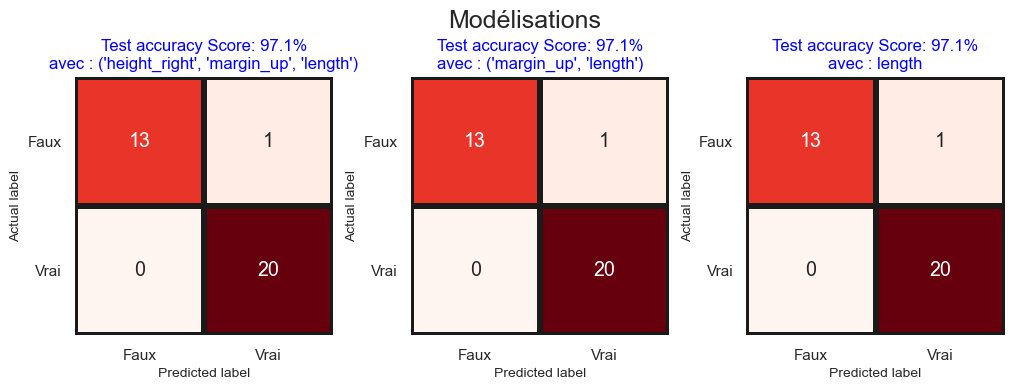

In [31]:
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})
plt.suptitle("Modélisations", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=1.05)
plt.subplot(1, 3, 1)
x_testbis_jet1=x_test[x_trainbis_jet1.columns]
predProbaSm1 = result_jet1.predict(x_testbis_jet1) # calcul de la prédiction sur l'échantillon test
predSm = np.where(predProbaSm1 > 0.5, 1, 0) # convertir en prédiction brute
tn, fp, fn, tp = confusion_matrix(y_test,predSm).ravel()
Accuracy1  = (tp+tn)/(tp+fp+fn+tn)                       #ratio of the correctly labeled subjects to the whole pool of subjects
Precision1 = tp/(tp+fp)                                       #ratio of the correctly T labeled by our program to all T labeled
Specificity1   = tn/(tn+fp)                            #probabilité d'obtenir un test négatif chez les non-malades
Recall1   = tp/(tp+fn)                            #ratio of the correctly T labeled by our program to all who are T in reality
F1_Score1 = 2*(Recall1 * Precision1) / (Recall1 + Precision1)             #best if balance between precision & recall in the system
mcSm = pd.crosstab(y_test,predSm) # matrice de confusion
mcSmNumpy1 = mcSm.values # transformer en matrice Numpy
accSm = np.sum(np.diagonal(mcSmNumpy1))/np.sum(mcSmNumpy1) # taux de succès
# print("Taux de succès : %.4f" % (accSm))
errSm = 1.0 - accSm # taux d'erreur
# print("Taux d'erreur' : %.4f" % (errSm))
x_axis_labels = ['Faux','Vrai']
y_axis_labels = ['Faux','Vrai']         
sns.heatmap(mcSmNumpy1, annot=True, fmt=".0f", linewidths=3, linecolor="k",square = True, cmap = 'Reds',
            annot_kws={"size": 20 / np.sqrt(len(cm))},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            cbar=False
           );
plt.yticks(rotation = 0)
plt.ylabel('Actual label',fontsize=10)
plt.xlabel('Predicted label',fontsize=10)
list_var1 = x_trainbis_jet1.columns[1],x_trainbis_jet1.columns[2],x_trainbis_jet1.columns[3]
all_sample_title = 'Test accuracy Score: {0}%\n'.format(round(accSm*100,1))+('avec : '+str(list_var1))
plt.title(all_sample_title, size = 12,c='blue')


plt.subplot(1, 3, 2)
x_testbis_jet2=x_test[x_trainbis_jet2.columns]
predProbaSm2 = result_jet2.predict(x_testbis_jet2) # calcul de la prédiction sur l'échantillon test
predSm = np.where(predProbaSm2 > 0.5, 1, 0) # convertir en prédiction brute
tn, fp, fn, tp = confusion_matrix(y_test,predSm).ravel()
Accuracy2  = (tp+tn)/(tp+fp+fn+tn)                       #ratio of the correctly labeled subjects to the whole pool of subjects
Precision2 = tp/(tp+fp)                                       #ratio of the correctly T labeled by our program to all T labeled
Specificity2   = tn/(tn+fp)                            #probabilité d'obtenir un test négatif chez les non-malades
Recall2   = tp/(tp+fn)                            #ratio of the correctly T labeled by our program to all who are T in reality
F1_Score2 = 2*(Recall2 * Precision2) / (Recall2 + Precision2)             #best if balance between precision & recall in the system
mcSm = pd.crosstab(y_test,predSm) # matrice de confusion
mcSmNumpy2 = mcSm.values # transformer en matrice Numpy
accSm = np.sum(np.diagonal(mcSmNumpy2))/np.sum(mcSmNumpy2) # taux de succès
errSm = 1.0 - accSm # taux d'erreur
x_axis_labels = ['Faux','Vrai']
y_axis_labels = ['Faux','Vrai']          
sns.heatmap(mcSmNumpy2, annot=True, fmt=".0f", linewidths=3, linecolor="k",square = True, cmap = 'Reds',
            annot_kws={"size": 20 / np.sqrt(len(cm))},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            cbar=False
           );
plt.yticks(rotation = 0)
plt.ylabel('Actual label',fontsize=10)
plt.xlabel('Predicted label',fontsize=10)
list_var2 = x_trainbis_jet2.columns[1],x_trainbis_jet2.columns[2]
all_sample_title = 'Test accuracy Score: {0}%\n'.format(round(accSm*100,1))+('avec : '+str(list_var2))
plt.title(all_sample_title, size = 12,c='blue')


fig=plt.subplot(1, 3, 3)
x_testbis_jet3=x_test[x_trainbis_jet3.columns]
predProbaSm3 = result_jet3.predict(x_testbis_jet3) # calcul de la prédiction sur l'échantillon test
predSm = np.where(predProbaSm3 > 0.5, 1, 0) # convertir en prédiction brute
tn, fp, fn, tp = confusion_matrix(y_test,predSm).ravel()
Accuracy3  = (tp+tn)/(tp+fp+fn+tn)                       #ratio of the correctly labeled subjects to the whole pool of subjects
Precision3 = tp/(tp+fp)                                       #ratio of the correctly T labeled by our program to all T labeled
Specificity3   = tn/(tn+fp)                            #probabilité d'obtenir un test négatif chez les non-malades
Recall3   = tp/(tp+fn)                            #ratio of the correctly T labeled by our program to all who are T in reality
F1_Score3 = 2*(Recall3 * Precision3) / (Recall3 + Precision3)             #best if balance between precision & recall in the system
mcSm = pd.crosstab(y_test,predSm) # matrice de confusion
mcSmNumpy3 = mcSm.values # transformer en matrice Numpy
accSm = np.sum(np.diagonal(mcSmNumpy3))/np.sum(mcSmNumpy3) # taux de succès
errSm = 1.0 - accSm # taux d'erreur
x_axis_labels = ['Faux','Vrai']
y_axis_labels = ['Faux','Vrai']          
sns.heatmap(mcSmNumpy3, annot=True, fmt=".0f", linewidths=3, linecolor="k",square = True, cmap = 'Reds',
            annot_kws={"size": 20 / np.sqrt(len(cm))},
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            cbar=False
           );
plt.yticks(rotation = 0)
plt.ylabel('Actual label',fontsize=10)
plt.xlabel('Predicted label',fontsize=10)
list_var3 = x_trainbis_jet3.columns[1]
list_var3
all_sample_title = 'Test accuracy Score: {0}%\n'.format(round(accSm*100,1))+('avec : '+str(list_var3))
plt.title(all_sample_title, size = 12,c='blue')
plt.subplots_adjust(hspace=0.01, wspace=0.3)
plt.savefig('OUTPUTS_FORMATION/P6_0_heatmap_modelisations.jpg',dpi=300)
plt.show()

#### Accuracy, Recall, Precision, F-Score & Specificity

In [32]:
df_test = pd.DataFrame({'Accuracy': [Accuracy1, Accuracy2, Accuracy3],
                       'Precision': [Precision1, Precision2, Precision3],
                       'Sensitivity': [Recall1, Recall2, Recall3],
                       'Specificity': [Specificity1, Specificity2, Specificity3],
                       'F1_Score': [F1_Score1, F1_Score2, F1_Score3]},
                        index = [list_var1, list_var2, list_var3]).round(3)
# Create a Pandas Excel writer using XlsxWriter as the engine.
excel_file = 'test1.xlsx'
sheet_name = 'gradient'
writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')
df_test.to_excel(writer, sheet_name=sheet_name)
workbook = writer.book
worksheet = writer.sheets[sheet_name]

# Apply a conditional format to the cell range.
worksheet.conditional_format('B2:F10', {'type': '3_color_scale', 'min_value':0.8, 'mid_value':0.9, 'max_value':1})

# Close the Pandas Excel writer and output the Excel file.
writer.save()

df_test

,Accuracy,Precision,Sensitivity,Specificity,F1_Score
"(height_right, margin_up, length)",0.971,0.952,1.0,0.929,0.976
"(margin_up, length)",0.971,0.952,1.0,0.929,0.976
length,0.971,0.952,1.0,0.929,0.976


#### Bilan

In [33]:
# We’ll use the predict method to predict the probabilities. 
# Then we’ll use the decision rule that probabilities above 0.5 are true and all others are false. 
all_predicted_train_j1  = result_jet1.predict(x_trainbis_jet1) > 0.5
all_predicted_test_j1   = result_jet1.predict(x_testbis_jet1)  > 0.5
all_predicted_train_j2  = result_jet2.predict(x_trainbis_jet2) > 0.5
all_predicted_test_j2   = result_jet2.predict(x_testbis_jet2)  > 0.5
all_predicted_train_j3  = result_jet3.predict(x_trainbis_jet3) > 0.5
all_predicted_test_j3   = result_jet3.predict(x_testbis_jet3)  > 0.5

comp =  [
['statsmodels',x_trainbis_jet1.columns.values,"{:.3f}".format(round(result_jet1.prsquared, 3)),"{:.1e}".format(result_jet1.llr_pvalue), 100*round((y_train==all_predicted_train_j1).mean(),3),100*round((y_test==all_predicted_test_j1).mean(),3)],
['statsmodels',x_trainbis_jet2.columns.values,"{:.3f}".format(round(result_jet2.prsquared, 3)),"{:.1e}".format(result_jet2.llr_pvalue),100*round((y_train==all_predicted_train_j2).mean(),3),100*round((y_test==all_predicted_test_j2).mean(),3)],
['statsmodels',x_trainbis_jet3.columns.values,"{:.3f}".format(round(result_jet3.prsquared, 3)),"{:.1e}".format(result_jet3.llr_pvalue), 100*round((y_train==all_predicted_train_j3).mean(),3),100*round((y_test==all_predicted_test_j3).mean(),3)],
        ]
df = pd.DataFrame(comp, columns =['package', 'Setting with',"McFadden's R²",'pvalue','train accuracy(%)','test accuracy(%)'])
df
# df.style.set_properties(**{'text-align': 'center'})

,package,Setting with,McFadden's R²,pvalue,train accuracy(%),test accuracy(%)
0,statsmodels,"[const, height_right, margin_up, length]",0.793,1.8e-31,95.6,97.1
1,statsmodels,"[const, margin_up, length]",0.739,2.7e-30,94.1,97.1
2,statsmodels,"[const, length]",0.702,5.6e-30,94.1,97.1


## Mission 4 : Test programme

#### Téléchargement jeu de données

In [37]:
url_test = 'INPUTS_FORMATION/test_notes.csv' # test_P6.csv example.csv
test_prog = pd.read_csv(url_test, sep=',',encoding='utf-8')
# test_prog

#### Ajout constante et réorganisation

In [38]:
test_prog_= test_prog.set_index('id')
test_prog_ = sm.tools.add_constant(test_prog_)
# test_prog_

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Prédire l'authenticité ou non d'un billet et donner la probabilité que le billet soit vrai


In [39]:
# Choix du modèle
x_test            = test_prog_[x_trainbis_jet3.columns]                 # adaptation du colonnage du dataset de test
predProbaSm       = result_jet3.predict(x_test)                         # prédiction sur l'échantillon test
predSm            = np.where(predProbaSm > 0.5, True, False)            # en prédiction brute
test_prog_['Authenticite_billet'] = predSm                              # ajout nv colonne statut authenticité
test_prog_['Probabilite(%)']      = np.round(100*predProbaSm.values,0)  # ajout nv colonne probabilité

def custom_style3(row):    
    highlight = 'background-color: lightcoral;'
    default   = 'background-color: limegreen;'
    if row['Authenticite_billet'] == False:
        return [highlight]
    else:
        return [default]
    
f = {'const':'{:.2f}','diagonal':'{:.2f}', 'height_left':'{:.2f}', 'height_right':'{:.2f}', 
     'margin_low':'{:.2f}', 'margin_up':'{:.2f}', 'length':'{:.2f}','Probabilite(%)':'{:.0f}'} 

test_prog_.style.apply(custom_style3, subset=['Authenticite_billet'], axis=1).format(f)

,const,diagonal,height_left,height_right,margin_low,margin_up,length,Authenticite_billet,Probabilite(%)
id,,,,,,,,,
A_1,1.00,171.76,104.01,103.54,5.21,3.30,111.42,False,1
A_2,1.00,171.87,104.17,104.13,6.00,3.31,112.09,False,14
A_3,1.00,172.00,104.58,104.29,4.99,3.39,111.57,False,1
A_4,1.00,172.49,104.55,104.34,4.44,3.03,113.20,True,96
A_5,1.00,171.65,103.63,103.56,3.77,3.16,113.33,True,98


## Hypothèses : tests statistiques

#### Vérification hypothèse de normalité : Distributions de Gauss

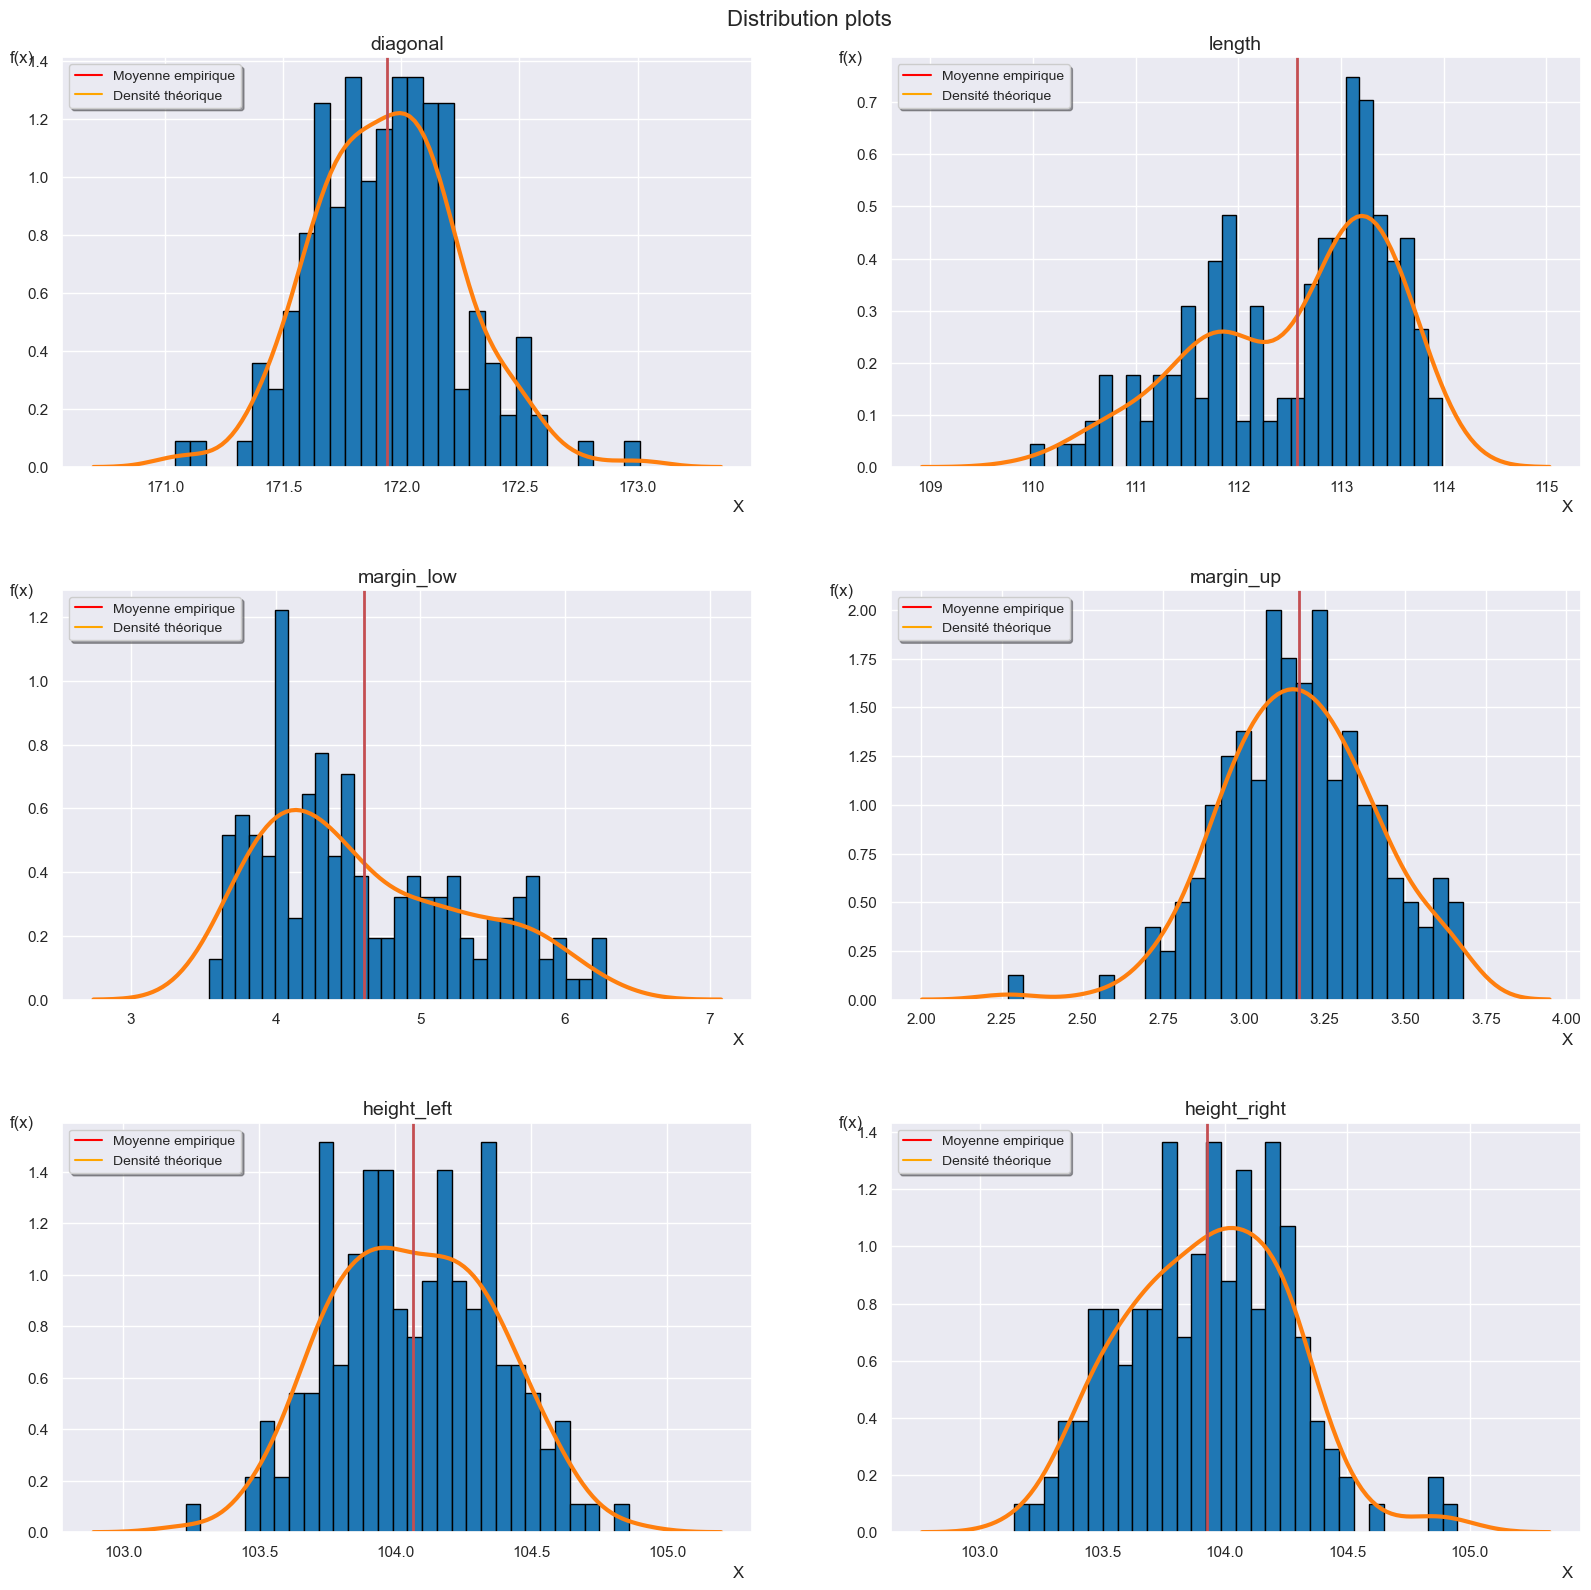

In [40]:
VAR_1 =  billets['diagonal']
VAR_2 =  billets['length']
VAR_3 =  billets['margin_low']
VAR_4 =  billets['margin_up']
VAR_5 =  billets['height_left']
VAR_6 =  billets['height_right']

plt.subplots(figsize=(16, 16))
plt.suptitle("Distribution plots", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# -----------------------------------------------------------------------------------Tracé histo + moyenne + densité gaussienne
plt.subplot(3, 2, 1)
sns.distplot(VAR_1, bins=30,kde_kws={"color": "tab:orange", "lw": 3},
             hist_kws={"histtype": "bar", "lw": 1,"alpha": 1, "color": "tab:blue","edgecolor":"black"})
plt.axvline(np.mean(VAR_1), color='r', linewidth=2)
import matplotlib.lines as mlines
colors = {'Moyenne empirique':'red', 'Densité théorique':'orange'}         
labels = list(colors.keys())
handles = [mlines.Line2D([], [], color=colors[label]) for label in labels] 
plt.legend(handles, labels, ncol=1, shadow=True, loc='upper left',fontsize=10)
plt.title(str(VAR_1.name), fontsize=14)
plt.xlabel("X", position=(0.98,0))
plt.ylabel("f(x)", position=(0,0.98),rotation = 0)

# -----------------------------------------------------------------------------------Tracé histo + moyenne + densité gaussienne
plt.subplot(3, 2, 2)
sns.distplot(VAR_2, bins=30,kde_kws={"color": "tab:orange", "lw": 3},
             hist_kws={"histtype": "bar", "lw": 1,"alpha": 1, "color": "tab:blue","edgecolor":"black"})
plt.axvline(np.mean(VAR_2), color='r', linewidth=2)
plt.legend(handles, labels, ncol=1, shadow=True, loc='upper left',fontsize=10)
plt.title(str(VAR_2.name), fontsize=14)
plt.xlabel("X", position=(0.98,0))
plt.ylabel("f(x)", position=(0,0.98),rotation = 0)
plt.ticklabel_format(useOffset=False, style='plain')

# -----------------------------------------------------------------------------------Tracé histo + moyenne + densité gaussienne
plt.subplot(3, 2, 3)
sns.distplot(VAR_3, bins=30,kde_kws={"color": "tab:orange", "lw": 3},
             hist_kws={"histtype": "bar", "lw": 1,"alpha": 1, "color": "tab:blue","edgecolor":"black"})
plt.axvline(np.mean(VAR_3), color='r', linewidth=2)
plt.legend(handles, labels, ncol=1, shadow=True, loc='upper left',fontsize=10)
plt.title(str(VAR_3.name), fontsize=14)
plt.xlabel("X", position=(0.98,0))
plt.ylabel("f(x)", position=(0,0.98),rotation = 0)

# -----------------------------------------------------------------------------------Tracé histo + moyenne + densité gaussienne
plt.subplot(3, 2, 4)
sns.distplot(VAR_4, bins=30,kde_kws={"color": "tab:orange", "lw": 3},
             hist_kws={"histtype": "bar", "lw": 1,"alpha": 1, "color": "tab:blue","edgecolor":"black"})
plt.axvline(np.mean(VAR_4), color='r', linewidth=2)
plt.legend(handles, labels, ncol=1, shadow=True, loc='upper left',fontsize=10)
plt.title(str(VAR_4.name), fontsize=14)
plt.xlabel("X", position=(0.98,0))
plt.ylabel("f(x)", position=(0,0.98),rotation = 0)

# -----------------------------------------------------------------------------------Tracé histo + moyenne + densité gaussienne
plt.subplot(3, 2, 5)
sns.distplot(VAR_5, bins=30, kde_kws={"color": "tab:orange", "lw": 3},
             hist_kws={"histtype": "bar", "lw": 1,"alpha": 1, "color": "tab:blue","edgecolor":"black"})
plt.axvline(np.mean(VAR_5), color='r', linewidth=2)
plt.legend(handles, labels, ncol=1, shadow=True, loc='upper left',fontsize=10)
plt.title(str(VAR_5.name), fontsize=14)
plt.xlabel("X", position=(0.98,0))
plt.ylabel("f(x)", position=(0,0.98),rotation = 0)

# -----------------------------------------------------------------------------------Tracé histo + moyenne + densité gaussienne
plt.subplot(3, 2, 6)
sns.distplot(VAR_6, bins=30,kde_kws={"color": "tab:orange", "lw": 3},
             hist_kws={"histtype": "bar", "lw": 1,"alpha": 1, "color": "tab:blue","edgecolor":"black"})
plt.axvline(np.mean(VAR_6), color='r', linewidth=2)
plt.legend(handles, labels, ncol=1, shadow=True, loc='upper left',fontsize=10)
plt.title(str(VAR_6.name), fontsize=14)
plt.xlabel("X", position=(0.98,0))
plt.ylabel("f(x)", position=(0,0.98),rotation = 0)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.savefig('OUTPUTS_FORMATION/P6_0_distri_Gauss.jpg',dpi=300)

#### Vérification hypothèse de normalité : Diagrammes Quantile-Quantile

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> colo

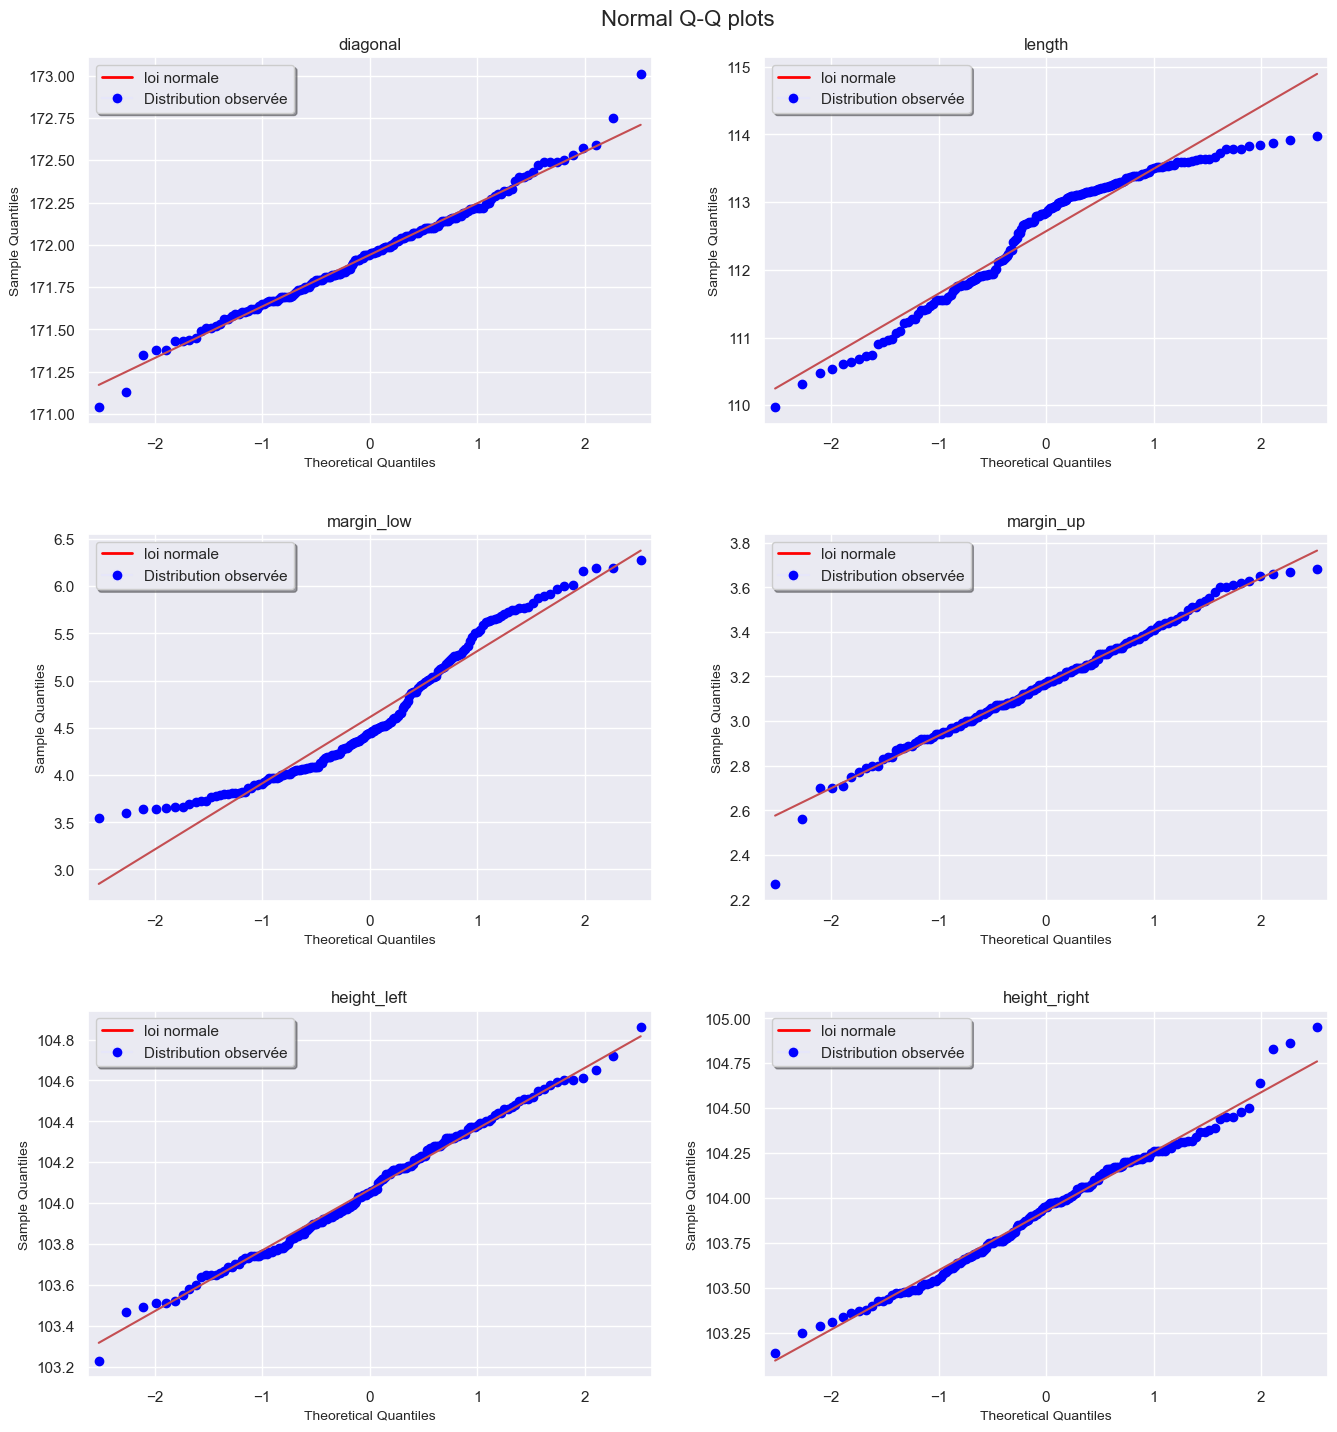

In [41]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import statsmodels.api as sm

fig = plt.figure(figsize=(16, 16))
plt.suptitle("Normal Q-Q plots", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
ax = fig.add_subplot(3, 2, 1)
sm.graphics.qqplot(VAR_1, line='s', ax=ax, color='blue')
plt.title(str(VAR_1.name),fontsize=12)
plt.xlabel("Theoretical Quantiles",fontsize=10)
plt.ylabel("Sample Quantiles",fontsize=10)
plt.grid(color='w', linestyle='-', linewidth=1)
plt.grid(True)
legend_elements = [Line2D([0], [0], color='red', lw=2, label='loi normale'),
                   Line2D([0], [0], marker='o', color='lavender', label='Distribution observée',markerfacecolor='blue', markersize=8),
                  ]
ax.legend(handles=legend_elements, loc='upper left',shadow=True)

ax = fig.add_subplot(3, 2, 2)
sm.graphics.qqplot(VAR_2, line='s', ax=ax, color='blue')
plt.title(str(VAR_2.name),fontsize=12)
plt.xlabel("Theoretical Quantiles",fontsize=10)
plt.ylabel("Sample Quantiles",fontsize=10)
plt.grid(color='w', linestyle='-', linewidth=1)
ax.legend(handles=legend_elements, loc='upper left',shadow=True)

ax = fig.add_subplot(3, 2, 3)
sm.graphics.qqplot(VAR_3, line='s', ax=ax, color='blue')
plt.title(str(VAR_3.name),fontsize=12)
plt.xlabel("Theoretical Quantiles",fontsize=10)
plt.ylabel("Sample Quantiles",fontsize=10)
plt.grid(color='w', linestyle='-', linewidth=1)
ax.legend(handles=legend_elements, loc='upper left',shadow=True)

ax = fig.add_subplot(3, 2, 4)
sm.graphics.qqplot(VAR_4, line='s', ax=ax, color='blue')
plt.title(str(VAR_4.name),fontsize=12)
plt.xlabel("Theoretical Quantiles",fontsize=10)
plt.ylabel("Sample Quantiles",fontsize=10)
plt.grid(color='w', linestyle='-', linewidth=1)
ax.legend(handles=legend_elements, loc='upper left',shadow=True)

ax = fig.add_subplot(3, 2, 5)
sm.graphics.qqplot(VAR_5, line='s', ax=ax, color='blue')
plt.title(str(VAR_5.name),fontsize=12)
plt.xlabel("Theoretical Quantiles",fontsize=10)
plt.ylabel("Sample Quantiles",fontsize=10)
plt.grid(color='w', linestyle='-', linewidth=1)
ax.legend(handles=legend_elements, loc='upper left',shadow=True)

ax = fig.add_subplot(3, 2, 6)
sm.graphics.qqplot(VAR_6, line='s', ax=ax, color='blue')
plt.title(str(VAR_6.name),fontsize=12)
plt.xlabel("Theoretical Quantiles",fontsize=10)
plt.ylabel("Sample Quantiles",fontsize=10)
plt.grid(color='w', linestyle='-', linewidth=1)
ax.legend(handles=legend_elements, loc='upper left',shadow=True)

plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.savefig('OUTPUTS_FORMATION/P6_0_QQplots.jpg',dpi=300)

#### Vérification hypothèse de normalité : Shapiro-Wilk ( /!\ sample size)

In [42]:
# obj: NE PAS REJETER Ho (la var a une distribution normale dans la population)
# En pratique, on cherche à limiter le risque de se tromper en obtenant une p_value>0.20 (ne pas se contenter de p_value>0.05)
from scipy import stats as st  
x=[VAR_1, VAR_2, VAR_3, VAR_4, VAR_5, VAR_6]
p_value    =[]
W_statistic=[]
statut_norm=[]
for i in x: 
    shap=st.shapiro(i)
#     print(shap)
#     print('\x1b[6;33;40m',f"{'W test statistic = ' : <10}{round(st.shapiro(i).statistic,3)}",'\x1b[0m')
#     print('\x1b[6;33;40m',f"{'p-value          = ' : <10}{round(st.shapiro(i).pvalue,5)}",'\x1b[0m')
#     if shap.pvalue > 0.05 :
#         print('\x1b[6;32;40m',"Avec une p_value > 5%, on accepte l’hypothèse de normalité (Ho). \n On peut considérer que la variable "+str(i.name.upper())+" suit une distribution normale.",'\x1b[0m')
#     else :
#         print('\x1b[6;31;40m',"Avec une p_value << 5%, on ne peut pas retenir l’hypothèse de normalité (Ho). \n On peut considérer que la variable "+str(i.name.upper())+" ne suit pas une distribution normale.",'\x1b[0m')
#     print('')
    W_statistic.append(shap.statistic)
    p_value.append(shap.pvalue)
    if shap.pvalue > 0.05:
        statut_norm.append("normal")
    else :
        statut_norm.append("#")
results = [W_statistic,p_value,statut_norm]
index   = ['W_statistic','p_value','Normality']
columns = [VAR_1.name, VAR_2.name, VAR_3.name, VAR_4.name, VAR_5.name, VAR_6.name]
df_Shapiro = pd.DataFrame(data=results, index=index, columns=columns)

def custom_style1(row):
    color = 'white'
    if row.values[2] == '#':
        color = 'lightcoral'
    else:
        color = 'limegreen'
    return ['background-color: %s' % color]*len(row.values)
df_Shapiro.style.apply(custom_style1, axis=0)   

,diagonal,length,margin_low,margin_up,height_left,height_right
W_statistic,0.993177,0.932463,0.935401,0.988917,0.992723,0.988121
p_value,0.610632,0.000000,0.000001,0.204448,0.553367,0.162528
Normality,normal,#,#,normal,normal,normal


#### Vérification hypothèse d'homoscédasticité : Levene

In [43]:
# comparaison 2 populations dans cas gaussien
clustocomp_1 =  0                           # choisir ici le 1er cluster à comparer
clustocomp_2 =  1                           # choisir ici le 2d cluster

# alternative to Bartlett’s test in the case where there are significant deviations from normality
from scipy.stats import levene
varGAUSS_1 =  'diagonal'
varGAUSS_2 =  'length'
varGAUSS_3 =  'margin_low'
varGAUSS_4 =  'margin_up'
varGAUSS_5 =  'height_left'
varGAUSS_6 =  'height_right'
x=[varGAUSS_1, varGAUSS_2, varGAUSS_3, varGAUSS_4, varGAUSS_5, varGAUSS_6]
p_value    =[]
Statistic  =[]
statut_var =[]
for i in x: 
    table_comp_vGauss_C1 = billets[billets['Cluster'] == clustocomp_1][i]   
    table_comp_vGauss_C2 = billets[billets['Cluster'] == clustocomp_2][i]   
    stat, p = levene(table_comp_vGauss_C1,table_comp_vGauss_C2)
#     print('\x1b[6;33;40m',f"{'Statistic = ' : <10}{round(stat,2)}",'\x1b[0m')
#     print('\x1b[6;33;40m',f"{'p-value   = ' : <10}{round(p   ,7)}",'\x1b[0m')
#     if p < 0.05 :
#         print('\x1b[6;31;40m',"Avec une p_value < 5%, on peut considérer que les 2 populations n'ont pas la même variance "+str(i.upper())+".",'\x1b[0m')
#     else :
#         print('\x1b[6;32;40m',"Avec une p_value > 5%, on peut considérer que les 2 populations présentent la même variance "+str(i.upper())+".",'\x1b[0m')
#     print('')
    Statistic.append(stat)
    p_value.append(p)
    if p < 0.05:
        statut_var.append("diff")
    else :
        statut_var.append("equal")
results = [Statistic, p_value, statut_var]
index   = ['Statistic','p_value','Variance']
columns = [varGAUSS_1, varGAUSS_2, varGAUSS_3, varGAUSS_4, varGAUSS_5, varGAUSS_6]
df_Levene = pd.DataFrame(data=results, index=index, columns=columns)
   
def custom_style2(row):
    color = 'white'
    if row.values[2] == 'diff':
        color = 'lightcoral'
    else:
        color = 'limegreen'
    return ['background-color: %s' % color]*len(row.values)
df_Levene.style.apply(custom_style2, axis=0)

,diagonal,length,margin_low,margin_up,height_left,height_right
Statistic,0.149330,14.091661,16.043976,0.001029,5.019990,1.798344
p_value,0.699665,0.000240,0.000093,0.974445,0.026367,0.181723
Variance,equal,diff,diff,equal,diff,equal


#### Vérification hypothèse Non-parametric : Mann-Whitney

In [44]:
from scipy.stats import mannwhitneyu,wilcoxon
# two-sample wilcoxon test a.k.a Mann Whitney U
varGAUSS_1 =  'diagonal'
varGAUSS_2 =  'length'
varGAUSS_3 =  'margin_low'
varGAUSS_4 =  'margin_up'
varGAUSS_5 =  'height_left'
varGAUSS_6 =  'height_right'
x=[varGAUSS_1, varGAUSS_2, varGAUSS_3, varGAUSS_4, varGAUSS_5, varGAUSS_6]
p_value    =[]
Statistic  =[]
statut_dist =[]
for i in x: 
    table_comp_vGauss_C1 = billets[billets['Cluster'] == clustocomp_1][i]   
    table_comp_vGauss_C2 = billets[billets['Cluster'] == clustocomp_2][i]   
    stat, p = mannwhitneyu(table_comp_vGauss_C1,table_comp_vGauss_C2)
#     print('\x1b[6;33;40m',f"{'Statistic = ' : <10}{round(stat,2)}",'\x1b[0m')
#     print('\x1b[6;33;40m','p=%.3e' %p,'\x1b[0m')
#     if p < 0.05 :
#         print('\x1b[6;31;40m',"Avec une p_value < 5%, different distribution (reject H0) "+str(i.upper())+".",'\x1b[0m')
#     else :
#         print('\x1b[6;32;40m',"Avec une p_value > 5%, same distribution (fail to reject H0) "+str(i.upper())+".",'\x1b[0m')
#     print('')
    Statistic.append(stat)
    p_value.append(p)
    if p < 0.05:
        statut_dist.append("diff")
    else :
        statut_dist.append("equal")
results = [Statistic, p_value, statut_dist]
index   = ['Statistic','p_value','Distribution']
columns = [varGAUSS_1, varGAUSS_2, varGAUSS_3, varGAUSS_4, varGAUSS_5, varGAUSS_6]
df_MannWhitU = pd.DataFrame(data=results, index=index, columns=columns)
df_MannWhitU.style.apply(custom_style2, axis=0)

,diagonal,length,margin_low,margin_up,height_left,height_right
Statistic,4197.500000,6833.000000,349.000000,1085.500000,1551.000000,1128.500000
p_value,0.023743,0.000000,0.000000,0.000000,0.000000,0.000000
Distribution,diff,diff,diff,diff,diff,diff
